In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import os
import numpy as np
import pandas as pd
import multiprocessing 

# These are the main files in MinScaffold/src/

import Driver
import Geometry
import Scaffold

# These libraries are used throughout the code

import math
from random import random
import networkx as nx
import pickle as pk
import matplotlib.pyplot as plt
from scipy.sparse import csgraph
from numpy import linalg
from gtda.homology import VietorisRipsPersistence
import seaborn as sns

from sklearn.cluster import KMeans

Далее рассматриваем матрицу модулей корреляций в качестве матрицы смежности и пропускаем через фильтрацию, меняя $\epsilon$ 

In [120]:
MSDL_diagrams = {'patients': [], 'controls': []}
AAL_diagrams = {'patients': [], 'controls': []}
BASC_diagrams = {'patients': [], 'controls': []}

In [6]:
###### вычисление распределения устойчивости одномерных гомологий ######

for dirpath, dirnames, filenames in os.walk('cor_data/'):
    for file in filenames:
        if filenames != ['.DS_Store']:
            print(file)
            df = pd.read_csv(os.path.join(dirpath, file))
            W = np.array(abs(df.iloc[:, 1:]))
            VR = VietorisRipsPersistence(metric="precomputed") 
            diagrams = VR.fit_transform([W])
            if dirpath.split('/')[-1] == 'MSDL':
                MSDL_diagrams[dirpath.split('/')[-2]].append(diagrams)
            if dirpath.split('/')[-1] == 'AAL':
                AAL_diagrams[dirpath.split('/')[-2]].append(diagrams)
            if dirpath.split('/')[-1] == 'BASC':
                BASC_diagrams[dirpath.split('/')[-2]].append(diagrams)

sub-OAS30650_ses-d1879_task-rest_run-2_atlas-MSDL.csv
sub-OAS30745_ses-d2863_task-rest_run-1_atlas-MSDL.csv
sub-OAS30152_ses-d0111_task-rest_run-1_atlas-MSDL.csv
sub-OAS30019_ses-d0376_task-rest_run-2_atlas-MSDL.csv
sub-OAS31124_ses-d0436_task-rest_run-1_atlas-MSDL.csv
sub-OAS30528_ses-d0012_task-rest_run-3_atlas-MSDL.csv
sub-OAS30751_ses-d0063_task-rest_run-1_atlas-MSDL.csv
sub-OAS30775_ses-d2381_task-rest_run-1_atlas-MSDL.csv
sub-OAS30078_ses-d0210_task-rest_run-1_atlas-MSDL.csv
sub-OAS30582_ses-d0153_task-rest_run-2_atlas-MSDL.csv
sub-OAS30926_ses-d1520_task-rest_run-2_atlas-MSDL.csv
sub-OAS30745_ses-d4282_task-rest_run-1_atlas-MSDL.csv
sub-OAS31126_ses-d1156_task-rest_run-2_atlas-MSDL.csv
sub-OAS30964_ses-d2772_task-rest_run-1_atlas-MSDL.csv
sub-OAS30315_ses-d0124_task-rest_run-2_atlas-MSDL.csv
sub-OAS30687_ses-d0064_task-rest_run-1_atlas-MSDL.csv
sub-OAS30156_ses-d0503_task-rest_run-2_atlas-MSDL.csv
sub-OAS30344_ses-d1052_task-rest_run-1_atlas-MSDL.csv
sub-OAS30124_ses-d0046_task-

sub-OAS30398_ses-d0051_task-rest_run-2_atlas-MSDL.csv
sub-OAS30805_ses-d7028_task-rest_run-1_atlas-MSDL.csv
sub-OAS31051_ses-d0365_task-rest_run-2_atlas-MSDL.csv
sub-OAS30326_ses-d0189_task-rest_run-2_atlas-MSDL.csv
sub-OAS31170_ses-d2410_task-rest_run-1_atlas-MSDL.csv
sub-OAS30153_ses-d3877_task-rest_run-1_atlas-MSDL.csv
sub-OAS31111_ses-d1108_task-rest_run-1_atlas-MSDL.csv
sub-OAS30114_ses-d0086_task-rest_run-2_atlas-MSDL.csv
sub-OAS30016_ses-d0021_task-rest_run-1_atlas-MSDL.csv
sub-OAS30720_ses-d1570_task-rest_run-2_atlas-MSDL.csv
sub-OAS30874_ses-d0057_task-rest_run-2_atlas-MSDL.csv
sub-OAS31054_ses-d2787_task-rest_run-1_atlas-MSDL.csv
sub-OAS30925_ses-d0196_task-rest_run-1_atlas-MSDL.csv
sub-OAS31134_ses-d0019_task-rest_run-2_atlas-MSDL.csv
sub-OAS30267_ses-d0043_task-rest_run-2_atlas-MSDL.csv
sub-OAS30686_ses-d0030_task-rest_run-1_atlas-MSDL.csv
sub-OAS30076_ses-d1735_task-rest_run-2_atlas-MSDL.csv
sub-OAS31050_ses-d0109_task-rest_run-2_atlas-MSDL.csv
sub-OAS30930_ses-d0900_task-

sub-OAS30811_ses-d7690_task-rest_run-2_atlas-MSDL.csv
sub-OAS30424_ses-d0095_task-rest_run-1_atlas-MSDL.csv
sub-OAS30095_ses-d0033_task-rest_run-1_atlas-MSDL.csv
sub-OAS30583_ses-d0085_task-rest_run-1_atlas-MSDL.csv
sub-OAS30692_ses-d2407_task-rest_run-2_atlas-MSDL.csv
sub-OAS30370_ses-d0141_task-rest_run-1_atlas-MSDL.csv
sub-OAS30883_ses-d0842_task-rest_run-1_atlas-MSDL.csv
sub-OAS30398_ses-d0051_task-rest_run-1_atlas-MSDL.csv
sub-OAS30883_ses-d0282_task-rest_run-1_atlas-MSDL.csv
sub-OAS30528_ses-d0012_task-rest_run-1_atlas-MSDL.csv
sub-OAS30926_ses-d0092_task-rest_run-1_atlas-MSDL.csv
sub-OAS30100_ses-d0158_task-rest_run-1_atlas-MSDL.csv
sub-OAS31051_ses-d0365_task-rest_run-1_atlas-MSDL.csv
sub-OAS30805_ses-d7028_task-rest_run-2_atlas-MSDL.csv
sub-OAS31024_ses-d2323_task-rest_run-3_atlas-MSDL.csv
sub-OAS30098_ses-d0036_task-rest_run-2_atlas-MSDL.csv
sub-OAS30978_ses-d0425_task-rest_run-2_atlas-MSDL.csv
sub-OAS30255_ses-d0019_task-rest_run-2_atlas-MSDL.csv
sub-OAS30948_ses-d0076_task-

sub-OAS30170_ses-d0005_task-rest_run-1_atlas-MSDL.csv
sub-OAS31139_ses-d0533_task-rest_run-2_atlas-MSDL.csv
sub-OAS30130_ses-d0025_task-rest_run-1_atlas-MSDL.csv
sub-OAS30076_ses-d0534_task-rest_run-1_atlas-MSDL.csv
sub-OAS30616_ses-d0199_task-rest_run-1_atlas-MSDL.csv
sub-OAS31068_ses-d2654_task-rest_run-3_atlas-MSDL.csv
sub-OAS30541_ses-d0823_task-rest_run-3_atlas-MSDL.csv
sub-OAS30954_ses-d0182_task-rest_run-2_atlas-MSDL.csv
sub-OAS30185_ses-d4551_task-rest_run-1_atlas-MSDL.csv
sub-OAS30198_ses-d0083_task-rest_run-2_atlas-MSDL.csv
sub-OAS30597_ses-d0234_task-rest_run-1_atlas-MSDL.csv
sub-OAS30617_ses-d0073_task-rest_run-2_atlas-MSDL.csv
sub-OAS30790_ses-d1461_task-rest_run-1_atlas-MSDL.csv
sub-OAS30804_ses-d0507_task-rest_run-2_atlas-MSDL.csv
sub-OAS31037_ses-d3770_task-rest_run-2_atlas-MSDL.csv
sub-OAS30460_ses-d0043_task-rest_run-2_atlas-MSDL.csv
sub-OAS30358_ses-d0367_task-rest_run-1_atlas-MSDL.csv
sub-OAS30929_ses-d0115_task-rest_run-2_atlas-MSDL.csv
sub-OAS30545_ses-d0028_task-

sub-OAS30964_ses-d3870_task-rest_run-2_atlas-MSDL.csv
sub-OAS30899_ses-d0072_task-rest_run-1_atlas-MSDL.csv
sub-OAS31128_ses-d1405_task-rest_run-1_atlas-MSDL.csv
sub-OAS30541_ses-d0823_task-rest_run-1_atlas-MSDL.csv
sub-OAS30929_ses-d0699_task-rest_run-3_atlas-MSDL.csv
sub-OAS30172_ses-d0028_task-rest_run-2_atlas-MSDL.csv
sub-OAS30999_ses-d0153_task-rest_run-1_atlas-MSDL.csv
sub-OAS31068_ses-d2654_task-rest_run-1_atlas-MSDL.csv
sub-OAS30702_ses-d0084_task-rest_run-1_atlas-MSDL.csv
sub-OAS30332_ses-d0091_task-rest_run-2_atlas-MSDL.csv
sub-OAS30027_ses-d2394_task-rest_run-1_atlas-MSDL.csv
sub-OAS30576_ses-d0084_task-rest_run-1_atlas-MSDL.csv
sub-OAS30990_ses-d0107_task-rest_run-1_atlas-MSDL.csv
sub-OAS30158_ses-d2467_task-rest_run-1_atlas-MSDL.csv
sub-OAS30358_ses-d0367_task-rest_run-2_atlas-MSDL.csv
sub-OAS30929_ses-d0115_task-rest_run-1_atlas-MSDL.csv
sub-OAS30545_ses-d0028_task-rest_run-2_atlas-MSDL.csv
sub-OAS31037_ses-d3770_task-rest_run-1_atlas-MSDL.csv
sub-OAS30460_ses-d0043_task-

sub-OAS30734_ses-d0097_task-rest_run-2_atlas-AAL.csv
sub-OAS30560_ses-d0117_task-rest_run-2_atlas-AAL.csv
sub-OAS30930_ses-d0900_task-rest_run-1_atlas-AAL.csv
sub-OAS30866_ses-d0033_task-rest_run-2_atlas-AAL.csv
sub-OAS30262_ses-d0839_task-rest_run-1_atlas-AAL.csv
sub-OAS30734_ses-d0857_task-rest_run-1_atlas-AAL.csv
sub-OAS30237_ses-d2478_task-rest_run-2_atlas-AAL.csv
sub-OAS30029_ses-d0131_task-rest_run-2_atlas-AAL.csv
sub-OAS30354_ses-d0056_task-rest_run-1_atlas-AAL.csv
sub-OAS31068_ses-d1547_task-rest_run-2_atlas-AAL.csv
sub-OAS30802_ses-d0132_task-rest_run-1_atlas-AAL.csv
sub-OAS30399_ses-d1220_task-rest_run-2_atlas-AAL.csv
sub-OAS30896_ses-d0439_task-rest_run-2_atlas-AAL.csv
sub-OAS30043_ses-d0145_task-rest_run-1_atlas-AAL.csv
sub-OAS30063_ses-d0160_task-rest_run-3_atlas-AAL.csv
sub-OAS30257_ses-d1938_task-rest_run-2_atlas-AAL.csv
sub-OAS30868_ses-d0115_task-rest_run-1_atlas-AAL.csv
sub-OAS30753_ses-d0035_task-rest_run-1_atlas-AAL.csv
sub-OAS31060_ses-d0083_task-rest_run-1_atlas-A

sub-OAS30237_ses-d2478_task-rest_run-1_atlas-AAL.csv
sub-OAS30262_ses-d0839_task-rest_run-2_atlas-AAL.csv
sub-OAS30734_ses-d0857_task-rest_run-2_atlas-AAL.csv
sub-OAS30802_ses-d0132_task-rest_run-2_atlas-AAL.csv
sub-OAS31068_ses-d1547_task-rest_run-1_atlas-AAL.csv
sub-OAS30354_ses-d0056_task-rest_run-2_atlas-AAL.csv
sub-OAS30866_ses-d0033_task-rest_run-1_atlas-AAL.csv
sub-OAS30560_ses-d0117_task-rest_run-1_atlas-AAL.csv
sub-OAS30734_ses-d0097_task-rest_run-1_atlas-AAL.csv
sub-OAS30873_ses-d0026_task-rest_run-1_atlas-AAL.csv
sub-OAS30504_ses-d0000_task-rest_run-1_atlas-AAL.csv
sub-OAS30930_ses-d0900_task-rest_run-2_atlas-AAL.csv
sub-OAS30863_ses-d4148_task-rest_run-2_atlas-AAL.csv
sub-OAS30891_ses-d0213_task-rest_run-2_atlas-AAL.csv
sub-OAS30619_ses-d2640_task-rest_run-2_atlas-AAL.csv
sub-OAS30087_ses-d0260_task-rest_run-1_atlas-AAL.csv
sub-OAS30452_ses-d2291_task-rest_run-1_atlas-AAL.csv
sub-OAS30095_ses-d0033_task-rest_run-1_atlas-AAL.csv
sub-OAS30342_ses-d0001_task-rest_run-2_atlas-A

sub-OAS30029_ses-d0893_task-rest_run-1_atlas-AAL.csv
sub-OAS30847_ses-d0040_task-rest_run-2_atlas-AAL.csv
sub-OAS30575_ses-d0115_task-rest_run-2_atlas-AAL.csv
sub-OAS30239_ses-d0175_task-rest_run-2_atlas-AAL.csv
sub-OAS30202_ses-d0175_task-rest_run-2_atlas-AAL.csv
sub-OAS31150_ses-d1416_task-rest_run-2_atlas-AAL.csv
sub-OAS30672_ses-d0107_task-rest_run-1_atlas-AAL.csv
sub-OAS30019_ses-d0376_task-rest_run-2_atlas-AAL.csv
sub-OAS30153_ses-d3877_task-rest_run-2_atlas-AAL.csv
sub-OAS30281_ses-d0042_task-rest_run-1_atlas-AAL.csv
sub-OAS30630_ses-d0133_task-rest_run-2_atlas-AAL.csv
sub-OAS30548_ses-d0447_task-rest_run-1_atlas-AAL.csv
sub-OAS30116_ses-d0017_task-rest_run-1_atlas-AAL.csv
sub-OAS31152_ses-d0092_task-rest_run-2_atlas-AAL.csv
sub-OAS30978_ses-d0425_task-rest_run-1_atlas-AAL.csv
sub-OAS30928_ses-d0884_task-rest_run-1_atlas-AAL.csv
sub-OAS30205_ses-d0061_task-rest_run-2_atlas-AAL.csv
sub-OAS30332_ses-d0091_task-rest_run-3_atlas-AAL.csv
sub-OAS30237_ses-d3368_task-rest_run-1_atlas-A

sub-OAS31127_ses-d2140_task-rest_run-2_atlas-AAL.csv
sub-OAS30533_ses-d0087_task-rest_run-2_atlas-AAL.csv
sub-OAS30424_ses-d0095_task-rest_run-2_atlas-AAL.csv
sub-OAS30987_ses-d0965_task-rest_run-1_atlas-AAL.csv
sub-OAS30582_ses-d0153_task-rest_run-2_atlas-AAL.csv
sub-OAS30152_ses-d0111_task-rest_run-2_atlas-AAL.csv
sub-OAS30999_ses-d0153_task-rest_run-2_atlas-AAL.csv
sub-OAS30388_ses-d0073_task-rest_run-2_atlas-AAL.csv
sub-OAS30165_ses-d1763_task-rest_run-2_atlas-AAL.csv
sub-OAS30557_ses-d2185_task-rest_run-2_atlas-AAL.csv
sub-OAS30130_ses-d0025_task-rest_run-1_atlas-AAL.csv
sub-OAS30334_ses-d0889_task-rest_run-2_atlas-AAL.csv
sub-OAS30452_ses-d3472_task-rest_run-1_atlas-AAL.csv
sub-OAS30622_ses-d0802_task-rest_run-2_atlas-AAL.csv
sub-OAS30954_ses-d0182_task-rest_run-2_atlas-AAL.csv
sub-OAS31054_ses-d2787_task-rest_run-2_atlas-AAL.csv
sub-OAS30421_ses-d2605_task-rest_run-2_atlas-AAL.csv
sub-OAS30849_ses-d0151_task-rest_run-1_atlas-AAL.csv
sub-OAS30714_ses-d0444_task-rest_run-1_atlas-A

sub-OAS30471_ses-d1883_task-rest_run-1_atlas-AAL.csv
sub-OAS30948_ses-d0076_task-rest_run-2_atlas-AAL.csv
sub-OAS31098_ses-d0048_task-rest_run-1_atlas-AAL.csv
sub-OAS30591_ses-d0403_task-rest_run-2_atlas-AAL.csv
sub-OAS30882_ses-d0191_task-rest_run-1_atlas-AAL.csv
sub-OAS30344_ses-d1052_task-rest_run-1_atlas-AAL.csv
sub-OAS30541_ses-d0823_task-rest_run-3_atlas-AAL.csv
sub-OAS30457_ses-d0102_task-rest_run-1_atlas-AAL.csv
sub-OAS30119_ses-d3722_task-rest_run-2_atlas-AAL.csv
sub-OAS30355_ses-d0048_task-rest_run-3_atlas-AAL.csv
sub-OAS30114_ses-d0086_task-rest_run-1_atlas-AAL.csv
sub-OAS30355_ses-d0861_task-rest_run-1_atlas-AAL.csv
sub-OAS31035_ses-d5659_task-rest_run-1_atlas-AAL.csv
sub-OAS30100_ses-d0158_task-rest_run-1_atlas-AAL.csv
sub-OAS30212_ses-d3043_task-rest_run-2_atlas-AAL.csv
sub-OAS30391_ses-d1547_task-rest_run-2_atlas-AAL.csv
sub-OAS30119_ses-d3260_task-rest_run-1_atlas-AAL.csv
sub-OAS30515_ses-d0044_task-rest_run-1_atlas-AAL.csv
sub-OAS30972_ses-d2270_task-rest_run-2_atlas-A

sub-OAS31098_ses-d0048_task-rest_run-2_atlas-AAL.csv
sub-OAS30789_ses-d0083_task-rest_run-2_atlas-AAL.csv
sub-OAS30316_ses-d0018_task-rest_run-1_atlas-AAL.csv
sub-OAS31163_ses-d0036_task-rest_run-1_atlas-AAL.csv
sub-OAS30650_ses-d1879_task-rest_run-2_atlas-AAL.csv
sub-OAS30528_ses-d0012_task-rest_run-3_atlas-AAL.csv
sub-OAS30867_ses-d1764_task-rest_run-2_atlas-AAL.csv
sub-OAS30661_ses-d0057_task-rest_run-1_atlas-AAL.csv
sub-OAS30282_ses-d0040_task-rest_run-2_atlas-BASC.csv
sub-OAS30399_ses-d2293_task-rest_run-2_atlas-BASC.csv
sub-OAS30982_ses-d1708_task-rest_run-2_atlas-BASC.csv
sub-OAS31030_ses-d0031_task-rest_run-1_atlas-BASC.csv
sub-OAS30815_ses-d0148_task-rest_run-2_atlas-BASC.csv
sub-OAS30896_ses-d0439_task-rest_run-1_atlas-BASC.csv
sub-OAS31093_ses-d0063_task-rest_run-1_atlas-BASC.csv
sub-OAS30653_ses-d0102_task-rest_run-1_atlas-BASC.csv
sub-OAS30541_ses-d0058_task-rest_run-1_atlas-BASC.csv
sub-OAS31127_ses-d2140_task-rest_run-2_atlas-BASC.csv
sub-OAS31082_ses-d0000_task-rest_run

sub-OAS30416_ses-d0044_task-rest_run-3_atlas-BASC.csv
sub-OAS30334_ses-d0889_task-rest_run-1_atlas-BASC.csv
sub-OAS30930_ses-d0900_task-rest_run-3_atlas-BASC.csv
sub-OAS30273_ses-d0461_task-rest_run-3_atlas-BASC.csv
sub-OAS30978_ses-d0425_task-rest_run-1_atlas-BASC.csv
sub-OAS30255_ses-d0019_task-rest_run-1_atlas-BASC.csv
sub-OAS30098_ses-d0036_task-rest_run-1_atlas-BASC.csv
sub-OAS30027_ses-d0433_task-rest_run-3_atlas-BASC.csv
sub-OAS30948_ses-d0076_task-rest_run-2_atlas-BASC.csv
sub-OAS30549_ses-d1244_task-rest_run-2_atlas-BASC.csv
sub-OAS30202_ses-d0175_task-rest_run-1_atlas-BASC.csv
sub-OAS30111_ses-d0385_task-rest_run-2_atlas-BASC.csv
sub-OAS30630_ses-d0133_task-rest_run-2_atlas-BASC.csv
sub-OAS30864_ses-d0603_task-rest_run-1_atlas-BASC.csv
sub-OAS30515_ses-d0044_task-rest_run-2_atlas-BASC.csv
sub-OAS30355_ses-d0048_task-rest_run-1_atlas-BASC.csv
sub-OAS30557_ses-d2185_task-rest_run-1_atlas-BASC.csv
sub-OAS30987_ses-d0965_task-rest_run-2_atlas-BASC.csv
sub-OAS30226_ses-d0183_task-

sub-OAS30474_ses-d0069_task-rest_run-1_atlas-BASC.csv
sub-OAS30622_ses-d0802_task-rest_run-2_atlas-BASC.csv
sub-OAS30891_ses-d0213_task-rest_run-2_atlas-BASC.csv
sub-OAS30388_ses-d0073_task-rest_run-1_atlas-BASC.csv
sub-OAS30859_ses-d0154_task-rest_run-2_atlas-BASC.csv
sub-OAS30334_ses-d0889_task-rest_run-2_atlas-BASC.csv
sub-OAS30850_ses-d0198_task-rest_run-1_atlas-BASC.csv
sub-OAS30782_ses-d0074_task-rest_run-2_atlas-BASC.csv
sub-OAS30098_ses-d0036_task-rest_run-2_atlas-BASC.csv
sub-OAS31024_ses-d2323_task-rest_run-3_atlas-BASC.csv
sub-OAS30255_ses-d0019_task-rest_run-2_atlas-BASC.csv
sub-OAS30978_ses-d0425_task-rest_run-2_atlas-BASC.csv
sub-OAS30549_ses-d1244_task-rest_run-1_atlas-BASC.csv
sub-OAS30202_ses-d0175_task-rest_run-2_atlas-BASC.csv
sub-OAS30948_ses-d0076_task-rest_run-1_atlas-BASC.csv
sub-OAS30478_ses-d3566_task-rest_run-1_atlas-BASC.csv
sub-OAS30457_ses-d0102_task-rest_run-2_atlas-BASC.csv
sub-OAS30433_ses-d1954_task-rest_run-1_atlas-BASC.csv
sub-OAS30397_ses-d0043_task-

sub-OAS30849_ses-d0151_task-rest_run-2_atlas-BASC.csv
sub-OAS30818_ses-d0097_task-rest_run-1_atlas-BASC.csv
sub-OAS31162_ses-d0107_task-rest_run-3_atlas-BASC.csv
sub-OAS30892_ses-d0029_task-rest_run-2_atlas-BASC.csv
sub-OAS30029_ses-d0131_task-rest_run-1_atlas-BASC.csv
sub-OAS30311_ses-d0127_task-rest_run-1_atlas-BASC.csv
sub-OAS30591_ses-d0403_task-rest_run-1_atlas-BASC.csv
sub-OAS30354_ses-d0056_task-rest_run-2_atlas-BASC.csv
sub-OAS31044_ses-d0827_task-rest_run-2_atlas-BASC.csv
sub-OAS30165_ses-d0563_task-rest_run-2_atlas-BASC.csv
sub-OAS30027_ses-d1300_task-rest_run-2_atlas-BASC.csv
sub-OAS30734_ses-d0097_task-rest_run-1_atlas-BASC.csv
sub-OAS31063_ses-d0146_task-rest_run-1_atlas-BASC.csv
sub-OAS31156_ses-d0001_task-rest_run-2_atlas-BASC.csv
sub-OAS31067_ses-d0037_task-rest_run-2_atlas-BASC.csv
sub-OAS30902_ses-d0015_task-rest_run-1_atlas-BASC.csv
sub-OAS30893_ses-d0053_task-rest_run-2_atlas-BASC.csv
sub-OAS31068_ses-d1547_task-rest_run-2_atlas-BASC.csv
sub-OAS30199_ses-d0024_task-

sub-OAS30830_ses-d0030_task-rest_run-2_atlas-BASC.csv
sub-OAS30608_ses-d2527_task-rest_run-1_atlas-BASC.csv
sub-OAS31086_ses-d0065_task-rest_run-1_atlas-BASC.csv
sub-OAS30273_ses-d2304_task-rest_run-1_atlas-BASC.csv
sub-OAS30087_ses-d0260_task-rest_run-1_atlas-BASC.csv
sub-OAS30262_ses-d0037_task-rest_run-2_atlas-BASC.csv
sub-OAS30215_ses-d0098_task-rest_run-2_atlas-BASC.csv
sub-OAS30281_ses-d0042_task-rest_run-1_atlas-BASC.csv
sub-OAS30334_ses-d0000_task-rest_run-2_atlas-BASC.csv
sub-OAS30292_ses-d0165_task-rest_run-2_atlas-BASC.csv
sub-OAS30930_ses-d0414_task-rest_run-2_atlas-BASC.csv
sub-OAS30978_ses-d0059_task-rest_run-2_atlas-BASC.csv
sub-OAS30869_ses-d1691_task-rest_run-2_atlas-BASC.csv
sub-OAS30257_ses-d1938_task-rest_run-1_atlas-BASC.csv
sub-OAS30399_ses-d0380_task-rest_run-1_atlas-BASC.csv
sub-OAS30964_ses-d3870_task-rest_run-2_atlas-BASC.csv
sub-OAS30899_ses-d0072_task-rest_run-1_atlas-BASC.csv
sub-OAS30471_ses-d1883_task-rest_run-1_atlas-BASC.csv
sub-OAS30495_ses-d0052_task-

sub-OAS30947_ses-d1688_task-rest_run-2_atlas-BASC.csv
sub-OAS30575_ses-d0115_task-rest_run-2_atlas-BASC.csv
sub-OAS30802_ses-d0132_task-rest_run-3_atlas-BASC.csv
sub-OAS30789_ses-d0083_task-rest_run-2_atlas-BASC.csv
sub-OAS30866_ses-d0640_task-rest_run-1_atlas-BASC.csv
sub-OAS30873_ses-d0026_task-rest_run-1_atlas-BASC.csv
sub-OAS31063_ses-d0917_task-rest_run-1_atlas-BASC.csv
sub-OAS30403_ses-d3669_task-rest_run-2_atlas-BASC.csv
sub-OAS30316_ses-d0018_task-rest_run-1_atlas-BASC.csv
sub-OAS30217_ses-d0077_task-rest_run-2_atlas-BASC.csv
sub-OAS30170_ses-d0005_task-rest_run-2_atlas-BASC.csv
sub-OAS31139_ses-d0533_task-rest_run-1_atlas-BASC.csv
sub-OAS30885_ses-d0075_task-rest_run-2_atlas-BASC.csv
sub-OAS31111_ses-d3618_task-rest_run-2_atlas-BASC.csv
sub-OAS30273_ses-d2304_task-rest_run-2_atlas-BASC.csv
sub-OAS30087_ses-d0260_task-rest_run-2_atlas-BASC.csv
sub-OAS30830_ses-d0030_task-rest_run-1_atlas-BASC.csv
sub-OAS30608_ses-d2527_task-rest_run-2_atlas-BASC.csv
sub-OAS31086_ses-d0065_task-

sub-OAS30371_ses-d0981_task-rest_run-1_atlas-MSDL.csv
sub-OAS30487_ses-d1338_task-rest_run-1_atlas-MSDL.csv
sub-OAS30049_ses-d1633_task-rest_run-1_atlas-MSDL.csv
sub-OAS30392_ses-d3145_task-rest_run-1_atlas-MSDL.csv
sub-OAS30014_ses-d0196_task-rest_run-2_atlas-MSDL.csv
sub-OAS30249_ses-d3431_task-rest_run-2_atlas-MSDL.csv
sub-OAS30933_ses-d2167_task-rest_run-1_atlas-MSDL.csv
sub-OAS30263_ses-d0970_task-rest_run-2_atlas-MSDL.csv
sub-OAS30823_ses-d1309_task-rest_run-1_atlas-MSDL.csv
sub-OAS31167_ses-d3530_task-rest_run-1_atlas-MSDL.csv
sub-OAS31153_ses-d1239_task-rest_run-1_atlas-MSDL.csv
sub-OAS30625_ses-d0033_task-rest_run-3_atlas-MSDL.csv
sub-OAS30430_ses-d0909_task-rest_run-1_atlas-MSDL.csv
sub-OAS30876_ses-d2447_task-rest_run-2_atlas-MSDL.csv
sub-OAS30780_ses-d0055_task-rest_run-1_atlas-MSDL.csv
sub-OAS30681_ses-d0141_task-rest_run-1_atlas-MSDL.csv
sub-OAS30735_ses-d3515_task-rest_run-2_atlas-MSDL.csv
sub-OAS30107_ses-d0940_task-rest_run-3_atlas-MSDL.csv
sub-OAS30193_ses-d1611_task-

sub-OAS30534_ses-d3728_task-rest_run-1_atlas-MSDL.csv
sub-OAS30004_ses-d3457_task-rest_run-1_atlas-MSDL.csv
sub-OAS30035_ses-d3850_task-rest_run-2_atlas-MSDL.csv
sub-OAS30733_ses-d3393_task-rest_run-2_atlas-MSDL.csv
sub-OAS31078_ses-d1173_task-rest_run-1_atlas-MSDL.csv
sub-OAS30050_ses-d1530_task-rest_run-1_atlas-MSDL.csv
sub-OAS31013_ses-d0039_task-rest_run-2_atlas-MSDL.csv
sub-OAS31118_ses-d2041_task-rest_run-2_atlas-MSDL.csv
sub-OAS30643_ses-d0893_task-rest_run-1_atlas-MSDL.csv
sub-OAS30149_ses-d1240_task-rest_run-1_atlas-MSDL.csv
sub-OAS30854_ses-d1385_task-rest_run-2_atlas-MSDL.csv
sub-OAS30744_ses-d1429_task-rest_run-1_atlas-MSDL.csv
sub-OAS30126_ses-d2361_task-rest_run-2_atlas-MSDL.csv
sub-OAS30075_ses-d0143_task-rest_run-1_atlas-MSDL.csv
sub-OAS30603_ses-d0811_task-rest_run-1_atlas-MSDL.csv
sub-OAS30861_ses-d1702_task-rest_run-1_atlas-MSDL.csv
sub-OAS30393_ses-d8651_task-rest_run-2_atlas-MSDL.csv
sub-OAS30725_ses-d2453_task-rest_run-2_atlas-MSDL.csv
sub-OAS30723_ses-d2568_task-

sub-OAS30480_ses-d0161_task-rest_run-3_atlas-MSDL.csv
sub-OAS31167_ses-d3530_task-rest_run-2_atlas-MSDL.csv
sub-OAS31153_ses-d1239_task-rest_run-2_atlas-MSDL.csv
sub-OAS30823_ses-d1309_task-rest_run-2_atlas-MSDL.csv
sub-OAS30193_ses-d1611_task-rest_run-1_atlas-MSDL.csv
sub-OAS30735_ses-d3515_task-rest_run-1_atlas-MSDL.csv
sub-OAS30681_ses-d0141_task-rest_run-2_atlas-MSDL.csv
sub-OAS30780_ses-d0055_task-rest_run-2_atlas-MSDL.csv
sub-OAS30600_ses-d3618_task-rest_run-2_atlas-MSDL.csv
sub-OAS30537_ses-d1848_task-rest_run-1_atlas-MSDL.csv
sub-OAS30146_ses-d3322_task-rest_run-2_atlas-MSDL.csv
sub-OAS30423_ses-d0067_task-rest_run-2_atlas-MSDL.csv
sub-OAS30921_ses-d1141_task-rest_run-2_atlas-MSDL.csv
sub-OAS30580_ses-d0032_task-rest_run-2_atlas-MSDL.csv
sub-OAS30525_ses-d1471_task-rest_run-2_atlas-MSDL.csv
sub-OAS30819_ses-d0572_task-rest_run-2_atlas-MSDL.csv
sub-OAS30188_ses-d3844_task-rest_run-2_atlas-MSDL.csv
sub-OAS31168_ses-d0148_task-rest_run-2_atlas-MSDL.csv
sub-OAS30907_ses-d0813_task-

sub-OAS30603_ses-d0811_task-rest_run-2_atlas-MSDL.csv
sub-OAS30109_ses-d0432_task-rest_run-2_atlas-MSDL.csv
sub-OAS30643_ses-d0893_task-rest_run-2_atlas-MSDL.csv
sub-OAS30149_ses-d1240_task-rest_run-2_atlas-MSDL.csv
sub-OAS30854_ses-d1385_task-rest_run-1_atlas-MSDL.csv
sub-OAS31118_ses-d2041_task-rest_run-1_atlas-MSDL.csv
sub-OAS30723_ses-d2568_task-rest_run-2_atlas-MSDL.csv
sub-OAS31168_ses-d1566_task-rest_run-1_atlas-MSDL.csv
sub-OAS31103_ses-d3821_task-rest_run-2_atlas-MSDL.csv
sub-OAS30725_ses-d2453_task-rest_run-1_atlas-MSDL.csv
sub-OAS30861_ses-d1702_task-rest_run-2_atlas-MSDL.csv
sub-OAS30393_ses-d8651_task-rest_run-1_atlas-MSDL.csv
sub-OAS30336_ses-d0012_task-rest_run-1_atlas-MSDL.csv
sub-OAS30065_ses-d2009_task-rest_run-1_atlas-MSDL.csv
sub-OAS30038_ses-d2242_task-rest_run-3_atlas-MSDL.csv
sub-OAS30747_ses-d3140_task-rest_run-1_atlas-MSDL.csv
sub-OAS31158_ses-d2481_task-rest_run-2_atlas-MSDL.csv
sub-OAS30084_ses-d1360_task-rest_run-2_atlas-MSDL.csv
sub-OAS30073_ses-d2851_task-

sub-OAS30048_ses-d4459_task-rest_run-1_atlas-MSDL.csv
sub-OAS30776_ses-d2471_task-rest_run-1_atlas-MSDL.csv
sub-OAS30978_ses-d1207_task-rest_run-1_atlas-MSDL.csv
sub-OAS30050_ses-d0110_task-rest_run-2_atlas-MSDL.csv
sub-OAS30614_ses-d4088_task-rest_run-1_atlas-MSDL.csv
sub-OAS30768_ses-d0887_task-rest_run-3_atlas-MSDL.csv
sub-OAS31021_ses-d0049_task-rest_run-1_atlas-MSDL.csv
sub-OAS30062_ses-d1745_task-rest_run-2_atlas-MSDL.csv
sub-OAS30496_ses-d1150_task-rest_run-1_atlas-MSDL.csv
sub-OAS30559_ses-d0431_task-rest_run-1_atlas-MSDL.csv
sub-OAS30004_ses-d2229_task-rest_run-1_atlas-MSDL.csv
sub-OAS30350_ses-d0018_task-rest_run-1_atlas-MSDL.csv
sub-OAS30438_ses-d0897_task-rest_run-3_atlas-MSDL.csv
sub-OAS30476_ses-d0090_task-rest_run-2_atlas-MSDL.csv
sub-OAS30058_ses-d3235_task-rest_run-1_atlas-MSDL.csv
sub-OAS30109_ses-d0997_task-rest_run-3_atlas-MSDL.csv
sub-OAS30841_ses-d1826_task-rest_run-2_atlas-MSDL.csv
sub-OAS30818_ses-d1228_task-rest_run-1_atlas-MSDL.csv
sub-OAS31118_ses-d2023_task-

sub-OAS30117_ses-d2034_task-rest_run-2_atlas-MSDL.csv
sub-OAS31172_ses-d1717_task-rest_run-1_atlas-MSDL.csv
sub-OAS30387_ses-d1832_task-rest_run-2_atlas-MSDL.csv
sub-OAS30742_ses-d3401_task-rest_run-2_atlas-MSDL.csv
sub-OAS30558_ses-d3408_task-rest_run-2_atlas-MSDL.csv
sub-OAS30392_ses-d1682_task-rest_run-2_atlas-MSDL.csv
sub-OAS30137_ses-d4525_task-rest_run-1_atlas-MSDL.csv
sub-OAS30603_ses-d2253_task-rest_run-1_atlas-MSDL.csv
sub-OAS30711_ses-d0434_task-rest_run-2_atlas-MSDL.csv
sub-OAS30731_ses-d2254_task-rest_run-2_atlas-MSDL.csv
sub-OAS30596_ses-d2477_task-rest_run-2_atlas-MSDL.csv
sub-OAS30194_ses-d8881_task-rest_run-2_atlas-MSDL.csv
sub-OAS30246_ses-d0119_task-rest_run-2_atlas-MSDL.csv
sub-OAS30335_ses-d2770_task-rest_run-1_atlas-MSDL.csv
sub-OAS30280_ses-d0667_task-rest_run-1_atlas-MSDL.csv
sub-OAS30756_ses-d0022_task-rest_run-2_atlas-MSDL.csv
sub-OAS30832_ses-d2382_task-rest_run-1_atlas-MSDL.csv
sub-OAS30028_ses-d0043_task-rest_run-1_atlas-MSDL.csv
sub-OAS30823_ses-d2277_task-

sub-OAS30143_ses-d2235_task-rest_run-1_atlas-MSDL.csv
sub-OAS30701_ses-d1333_task-rest_run-2_atlas-MSDL.csv
sub-OAS30127_ses-d0098_task-rest_run-1_atlas-MSDL.csv
sub-OAS30986_ses-d1188_task-rest_run-3_atlas-MSDL.csv
sub-OAS30612_ses-d0039_task-rest_run-2_atlas-MSDL.csv
sub-OAS30137_ses-d3165_task-rest_run-1_atlas-MSDL.csv
sub-OAS30093_ses-d1192_task-rest_run-2_atlas-MSDL.csv
sub-OAS30770_ses-d1210_task-rest_run-1_atlas-MSDL.csv
sub-OAS30823_ses-d2722_task-rest_run-2_atlas-MSDL.csv
sub-OAS30084_ses-d0470_task-rest_run-1_atlas-MSDL.csv
sub-OAS30830_ses-d1569_task-rest_run-1_atlas-MSDL.csv
sub-OAS30624_ses-d2896_task-rest_run-2_atlas-MSDL.csv
sub-OAS30473_ses-d1163_task-rest_run-1_atlas-MSDL.csv
sub-OAS30040_ses-d4230_task-rest_run-1_atlas-MSDL.csv
sub-OAS30126_ses-d3465_task-rest_run-1_atlas-MSDL.csv
sub-OAS30956_ses-d2573_task-rest_run-1_atlas-MSDL.csv
sub-OAS31088_ses-d2045_task-rest_run-1_atlas-MSDL.csv
sub-OAS30066_ses-d2006_task-rest_run-1_atlas-MSDL.csv
sub-OAS30768_ses-d0024_task-

sub-OAS30823_ses-d2277_task-rest_run-1_atlas-MSDL.csv
sub-OAS30701_ses-d2371_task-rest_run-2_atlas-MSDL.csv
sub-OAS31014_ses-d3555_task-rest_run-2_atlas-MSDL.csv
sub-OAS30015_ses-d1374_task-rest_run-2_atlas-MSDL.csv
sub-OAS30755_ses-d2318_task-rest_run-2_atlas-MSDL.csv
sub-OAS30164_ses-d0975_task-rest_run-3_atlas-MSDL.csv
sub-OAS31073_ses-d0779_task-rest_run-1_atlas-MSDL.csv
sub-OAS30624_ses-d1643_task-rest_run-1_atlas-MSDL.csv
sub-OAS30184_ses-d0876_task-rest_run-2_atlas-MSDL.csv
sub-OAS30146_ses-d2309_task-rest_run-2_atlas-MSDL.csv
sub-OAS30353_ses-d0963_task-rest_run-3_atlas-MSDL.csv
sub-OAS30048_ses-d3367_task-rest_run-2_atlas-MSDL.csv
sub-OAS30127_ses-d0837_task-rest_run-2_atlas-MSDL.csv
sub-OAS30004_ses-d1101_task-rest_run-2_atlas-MSDL.csv
sub-OAS30487_ses-d2165_task-rest_run-1_atlas-MSDL.csv
sub-OAS30981_ses-d0061_task-rest_run-2_atlas-MSDL.csv
sub-OAS30387_ses-d1832_task-rest_run-1_atlas-MSDL.csv
sub-OAS30671_ses-d1122_task-rest_run-2_atlas-MSDL.csv
sub-OAS30742_ses-d3401_task-

sub-OAS30568_ses-d1281_task-rest_run-1_atlas-AAL.csv
sub-OAS30632_ses-d0106_task-rest_run-2_atlas-AAL.csv
sub-OAS30324_ses-d0119_task-rest_run-2_atlas-AAL.csv
sub-OAS30701_ses-d0054_task-rest_run-3_atlas-AAL.csv
sub-OAS31048_ses-d1151_task-rest_run-1_atlas-AAL.csv
sub-OAS31158_ses-d0668_task-rest_run-1_atlas-AAL.csv
sub-OAS31048_ses-d3195_task-rest_run-1_atlas-AAL.csv
sub-OAS30673_ses-d3803_task-rest_run-2_atlas-AAL.csv
sub-OAS30876_ses-d2447_task-rest_run-1_atlas-AAL.csv
sub-OAS30246_ses-d0119_task-rest_run-3_atlas-AAL.csv
sub-OAS30073_ses-d2851_task-rest_run-3_atlas-AAL.csv
sub-OAS30395_ses-d0002_task-rest_run-2_atlas-AAL.csv
sub-OAS30361_ses-d2151_task-rest_run-2_atlas-AAL.csv
sub-OAS31114_ses-d1864_task-rest_run-2_atlas-AAL.csv
sub-OAS31114_ses-d1442_task-rest_run-2_atlas-AAL.csv
sub-OAS30632_ses-d1800_task-rest_run-1_atlas-AAL.csv
sub-OAS30744_ses-d1429_task-rest_run-2_atlas-AAL.csv
sub-OAS30887_ses-d0064_task-rest_run-2_atlas-AAL.csv
sub-OAS30066_ses-d0524_task-rest_run-2_atlas-A

sub-OAS30715_ses-d0060_task-rest_run-2_atlas-AAL.csv
sub-OAS30535_ses-d0139_task-rest_run-1_atlas-AAL.csv
sub-OAS31025_ses-d1258_task-rest_run-3_atlas-AAL.csv
sub-OAS30414_ses-d0363_task-rest_run-2_atlas-AAL.csv
sub-OAS30725_ses-d3121_task-rest_run-2_atlas-AAL.csv
sub-OAS30079_ses-d0019_task-rest_run-3_atlas-AAL.csv
sub-OAS30083_ses-d2882_task-rest_run-1_atlas-AAL.csv
sub-OAS30755_ses-d1540_task-rest_run-1_atlas-AAL.csv
sub-OAS30496_ses-d0065_task-rest_run-2_atlas-AAL.csv
sub-OAS30829_ses-d7552_task-rest_run-2_atlas-AAL.csv
sub-OAS30028_ses-d0043_task-rest_run-2_atlas-AAL.csv
sub-OAS30770_ses-d2131_task-rest_run-1_atlas-AAL.csv
sub-OAS30462_ses-d0469_task-rest_run-2_atlas-AAL.csv
sub-OAS30093_ses-d0070_task-rest_run-2_atlas-AAL.csv
sub-OAS30083_ses-d3827_task-rest_run-2_atlas-AAL.csv
sub-OAS30005_ses-d1274_task-rest_run-2_atlas-AAL.csv
sub-OAS31088_ses-d2045_task-rest_run-2_atlas-AAL.csv
sub-OAS30392_ses-d1682_task-rest_run-1_atlas-AAL.csv
sub-OAS30004_ses-d2229_task-rest_run-2_atlas-A

sub-OAS30817_ses-d0236_task-rest_run-2_atlas-AAL.csv
sub-OAS30652_ses-d0778_task-rest_run-3_atlas-AAL.csv
sub-OAS30913_ses-d0931_task-rest_run-2_atlas-AAL.csv
sub-OAS31094_ses-d0103_task-rest_run-2_atlas-AAL.csv
sub-OAS30002_ses-d2345_task-rest_run-2_atlas-AAL.csv
sub-OAS30079_ses-d2668_task-rest_run-1_atlas-AAL.csv
sub-OAS30295_ses-d0967_task-rest_run-1_atlas-AAL.csv
sub-OAS30074_ses-d1871_task-rest_run-2_atlas-AAL.csv
sub-OAS30671_ses-d2486_task-rest_run-1_atlas-AAL.csv
sub-OAS30075_ses-d0143_task-rest_run-1_atlas-AAL.csv
sub-OAS30600_ses-d1176_task-rest_run-3_atlas-AAL.csv
sub-OAS30331_ses-d4694_task-rest_run-2_atlas-AAL.csv
sub-OAS30832_ses-d2382_task-rest_run-1_atlas-AAL.csv
sub-OAS30049_ses-d1633_task-rest_run-1_atlas-AAL.csv
sub-OAS30072_ses-d1379_task-rest_run-1_atlas-AAL.csv
sub-OAS31118_ses-d2041_task-rest_run-1_atlas-AAL.csv
sub-OAS30625_ses-d0033_task-rest_run-1_atlas-AAL.csv
sub-OAS30647_ses-d1286_task-rest_run-2_atlas-AAL.csv
sub-OAS30777_ses-d2999_task-rest_run-2_atlas-A

sub-OAS30009_ses-d2457_task-rest_run-2_atlas-AAL.csv
sub-OAS30725_ses-d2453_task-rest_run-2_atlas-AAL.csv
sub-OAS31047_ses-d0183_task-rest_run-2_atlas-AAL.csv
sub-OAS31009_ses-d1049_task-rest_run-3_atlas-AAL.csv
sub-OAS30872_ses-d3057_task-rest_run-2_atlas-AAL.csv
sub-OAS30898_ses-d0946_task-rest_run-2_atlas-AAL.csv
sub-OAS30963_ses-d1279_task-rest_run-2_atlas-AAL.csv
sub-OAS30683_ses-d0528_task-rest_run-1_atlas-AAL.csv
sub-OAS30038_ses-d4495_task-rest_run-2_atlas-AAL.csv
sub-OAS31125_ses-d3093_task-rest_run-2_atlas-AAL.csv
sub-OAS30233_ses-d3867_task-rest_run-2_atlas-AAL.csv
sub-OAS30073_ses-d2042_task-rest_run-2_atlas-AAL.csv
sub-OAS30502_ses-d0395_task-rest_run-2_atlas-AAL.csv
sub-OAS30097_ses-d2551_task-rest_run-1_atlas-AAL.csv
sub-OAS30146_ses-d2309_task-rest_run-1_atlas-AAL.csv
sub-OAS30727_ses-d1208_task-rest_run-1_atlas-AAL.csv
sub-OAS30942_ses-d0752_task-rest_run-1_atlas-AAL.csv
sub-OAS30084_ses-d1360_task-rest_run-1_atlas-AAL.csv
sub-OAS30135_ses-d1000_task-rest_run-2_atlas-A

sub-OAS30423_ses-d1267_task-rest_run-1_atlas-AAL.csv
sub-OAS30589_ses-d1525_task-rest_run-1_atlas-AAL.csv
sub-OAS30033_ses-d1267_task-rest_run-1_atlas-AAL.csv
sub-OAS30625_ses-d0033_task-rest_run-3_atlas-AAL.csv
sub-OAS30737_ses-d0035_task-rest_run-2_atlas-AAL.csv
sub-OAS30841_ses-d3499_task-rest_run-1_atlas-AAL.csv
sub-OAS30291_ses-d0078_task-rest_run-1_atlas-AAL.csv
sub-OAS30178_ses-d3500_task-rest_run-2_atlas-AAL.csv
sub-OAS31167_ses-d3530_task-rest_run-1_atlas-AAL.csv
sub-OAS30191_ses-d2352_task-rest_run-2_atlas-AAL.csv
sub-OAS30275_ses-d1006_task-rest_run-2_atlas-AAL.csv
sub-OAS30220_ses-d0104_task-rest_run-2_atlas-AAL.csv
sub-OAS30747_ses-d3140_task-rest_run-2_atlas-AAL.csv
sub-OAS30603_ses-d2253_task-rest_run-2_atlas-AAL.csv
sub-OAS30117_ses-d4155_task-rest_run-1_atlas-AAL.csv
sub-OAS30336_ses-d0012_task-rest_run-2_atlas-AAL.csv
sub-OAS31158_ses-d0029_task-rest_run-2_atlas-AAL.csv
sub-OAS31021_ses-d0049_task-rest_run-1_atlas-AAL.csv
sub-OAS30703_ses-d0588_task-rest_run-3_atlas-A

sub-OAS31142_ses-d1267_task-rest_run-1_atlas-AAL.csv
sub-OAS31153_ses-d1239_task-rest_run-2_atlas-AAL.csv
sub-OAS30113_ses-d2280_task-rest_run-2_atlas-AAL.csv
sub-OAS30402_ses-d0015_task-rest_run-1_atlas-AAL.csv
sub-OAS30780_ses-d0055_task-rest_run-1_atlas-AAL.csv
sub-OAS31172_ses-d1717_task-rest_run-2_atlas-AAL.csv
sub-OAS30126_ses-d2361_task-rest_run-2_atlas-AAL.csv
sub-OAS30473_ses-d1163_task-rest_run-2_atlas-AAL.csv
sub-OAS31039_ses-d1184_task-rest_run-1_atlas-AAL.csv
sub-OAS30534_ses-d1174_task-rest_run-1_atlas-AAL.csv
sub-OAS30146_ses-d3322_task-rest_run-2_atlas-AAL.csv
sub-OAS30411_ses-d3011_task-rest_run-2_atlas-AAL.csv
sub-OAS30605_ses-d0941_task-rest_run-2_atlas-AAL.csv
sub-OAS30537_ses-d0029_task-rest_run-2_atlas-AAL.csv
sub-OAS30907_ses-d1953_task-rest_run-1_atlas-AAL.csv
sub-OAS30258_ses-d1225_task-rest_run-2_atlas-AAL.csv
sub-OAS31164_ses-d1678_task-rest_run-1_atlas-AAL.csv
sub-OAS30817_ses-d2324_task-rest_run-2_atlas-AAL.csv
sub-OAS30038_ses-d2242_task-rest_run-2_atlas-A

sub-OAS30065_ses-d0548_task-rest_run-2_atlas-AAL.csv
sub-OAS30276_ses-d3217_task-rest_run-2_atlas-AAL.csv
sub-OAS30007_ses-d2722_task-rest_run-2_atlas-AAL.csv
sub-OAS31153_ses-d1174_task-rest_run-1_atlas-AAL.csv
sub-OAS30713_ses-d0095_task-rest_run-3_atlas-AAL.csv
sub-OAS31104_ses-d1321_task-rest_run-1_atlas-AAL.csv
sub-OAS30643_ses-d0280_task-rest_run-1_atlas-AAL.csv
sub-OAS30050_ses-d0110_task-rest_run-1_atlas-AAL.csv
sub-OAS30884_ses-d2400_task-rest_run-1_atlas-AAL.csv
sub-OAS30769_ses-d0039_task-rest_run-2_atlas-AAL.csv
sub-OAS30137_ses-d3165_task-rest_run-2_atlas-AAL.csv
sub-OAS30792_ses-d0106_task-rest_run-1_atlas-AAL.csv
sub-OAS30357_ses-d0535_task-rest_run-1_atlas-AAL.csv
sub-OAS30403_ses-d2379_task-rest_run-2_atlas-AAL.csv
sub-OAS30015_ses-d0116_task-rest_run-1_atlas-AAL.csv
sub-OAS30073_ses-d3670_task-rest_run-2_atlas-AAL.csv
sub-OAS30072_ses-d2219_task-rest_run-2_atlas-AAL.csv
sub-OAS30572_ses-d0058_task-rest_run-2_atlas-AAL.csv
sub-OAS30685_ses-d0032_task-rest_run-2_atlas-A

sub-OAS30006_ses-d2341_task-rest_run-2_atlas-AAL.csv
sub-OAS30101_ses-d0919_task-rest_run-3_atlas-AAL.csv
sub-OAS30778_ses-d2255_task-rest_run-2_atlas-AAL.csv
sub-OAS30852_ses-d3983_task-rest_run-1_atlas-AAL.csv
sub-OAS30097_ses-d0504_task-rest_run-1_atlas-AAL.csv
sub-OAS31028_ses-d0058_task-rest_run-2_atlas-AAL.csv
sub-OAS30320_ses-d0136_task-rest_run-2_atlas-AAL.csv
sub-OAS30562_ses-d2363_task-rest_run-1_atlas-AAL.csv
sub-OAS30272_ses-d0057_task-rest_run-2_atlas-AAL.csv
sub-OAS30867_ses-d4407_task-rest_run-1_atlas-AAL.csv
sub-OAS30794_ses-d4550_task-rest_run-1_atlas-AAL.csv
sub-OAS30786_ses-d3713_task-rest_run-2_atlas-AAL.csv
sub-OAS30794_ses-d3513_task-rest_run-1_atlas-AAL.csv
sub-OAS30048_ses-d4459_task-rest_run-2_atlas-AAL.csv
sub-OAS30458_ses-d0070_task-rest_run-1_atlas-AAL.csv
sub-OAS30574_ses-d0918_task-rest_run-2_atlas-AAL.csv
sub-OAS30046_ses-d1968_task-rest_run-2_atlas-AAL.csv
sub-OAS30025_ses-d2298_task-rest_run-2_atlas-AAL.csv
sub-OAS30335_ses-d3812_task-rest_run-2_atlas-A

sub-OAS31059_ses-d3491_task-rest_run-2_atlas-BASC.csv
sub-OAS31009_ses-d3330_task-rest_run-2_atlas-BASC.csv
sub-OAS30324_ses-d0119_task-rest_run-2_atlas-BASC.csv
sub-OAS30525_ses-d1471_task-rest_run-1_atlas-BASC.csv
sub-OAS30188_ses-d3844_task-rest_run-1_atlas-BASC.csv
sub-OAS30819_ses-d0572_task-rest_run-1_atlas-BASC.csv
sub-OAS31168_ses-d0148_task-rest_run-1_atlas-BASC.csv
sub-OAS30007_ses-d0061_task-rest_run-2_atlas-BASC.csv
sub-OAS30907_ses-d0813_task-rest_run-1_atlas-BASC.csv
sub-OAS30160_ses-d2392_task-rest_run-2_atlas-BASC.csv
sub-OAS30256_ses-d1284_task-rest_run-3_atlas-BASC.csv
sub-OAS30251_ses-d0220_task-rest_run-2_atlas-BASC.csv
sub-OAS30369_ses-d5872_task-rest_run-2_atlas-BASC.csv
sub-OAS30387_ses-d3401_task-rest_run-2_atlas-BASC.csv
sub-OAS30002_ses-d2340_task-rest_run-2_atlas-BASC.csv
sub-OAS30072_ses-d2219_task-rest_run-1_atlas-BASC.csv
sub-OAS30284_ses-d3510_task-rest_run-2_atlas-BASC.csv
sub-OAS30681_ses-d0141_task-rest_run-1_atlas-BASC.csv
sub-OAS30780_ses-d0055_task-

sub-OAS30729_ses-d3628_task-rest_run-1_atlas-BASC.csv
sub-OAS30375_ses-d5792_task-rest_run-2_atlas-BASC.csv
sub-OAS30003_ses-d2669_task-rest_run-1_atlas-BASC.csv
sub-OAS30080_ses-d0048_task-rest_run-1_atlas-BASC.csv
sub-OAS30715_ses-d0060_task-rest_run-2_atlas-BASC.csv
sub-OAS30449_ses-d2359_task-rest_run-2_atlas-BASC.csv
sub-OAS30361_ses-d2151_task-rest_run-1_atlas-BASC.csv
sub-OAS30178_ses-d2443_task-rest_run-2_atlas-BASC.csv
sub-OAS30126_ses-d1105_task-rest_run-1_atlas-BASC.csv
sub-OAS30767_ses-d0948_task-rest_run-1_atlas-BASC.csv
sub-OAS31045_ses-d1901_task-rest_run-1_atlas-BASC.csv
sub-OAS30487_ses-d0064_task-rest_run-1_atlas-BASC.csv
sub-OAS30353_ses-d3421_task-rest_run-1_atlas-BASC.csv
sub-OAS30101_ses-d0919_task-rest_run-2_atlas-BASC.csv
sub-OAS30711_ses-d2521_task-rest_run-2_atlas-BASC.csv
sub-OAS31059_ses-d1231_task-rest_run-1_atlas-BASC.csv
sub-OAS31138_ses-d0487_task-rest_run-1_atlas-BASC.csv
sub-OAS30803_ses-d3424_task-rest_run-1_atlas-BASC.csv
sub-OAS30142_ses-d0075_task-

sub-OAS30559_ses-d1236_task-rest_run-1_atlas-BASC.csv
sub-OAS30175_ses-d1091_task-rest_run-3_atlas-BASC.csv
sub-OAS30854_ses-d2339_task-rest_run-1_atlas-BASC.csv
sub-OAS30487_ses-d1338_task-rest_run-2_atlas-BASC.csv
sub-OAS30371_ses-d0981_task-rest_run-2_atlas-BASC.csv
sub-OAS30392_ses-d3145_task-rest_run-2_atlas-BASC.csv
sub-OAS30049_ses-d1633_task-rest_run-2_atlas-BASC.csv
sub-OAS30854_ses-d0069_task-rest_run-2_atlas-BASC.csv
sub-OAS30014_ses-d0196_task-rest_run-1_atlas-BASC.csv
sub-OAS30367_ses-d3394_task-rest_run-1_atlas-BASC.csv
sub-OAS30942_ses-d0111_task-rest_run-2_atlas-BASC.csv
sub-OAS30026_ses-d0048_task-rest_run-2_atlas-BASC.csv
sub-OAS30633_ses-d0111_task-rest_run-3_atlas-BASC.csv
sub-OAS31168_ses-d0148_task-rest_run-2_atlas-BASC.csv
sub-OAS30007_ses-d0061_task-rest_run-1_atlas-BASC.csv
sub-OAS30907_ses-d0813_task-rest_run-2_atlas-BASC.csv
sub-OAS30525_ses-d1471_task-rest_run-2_atlas-BASC.csv
sub-OAS30188_ses-d3844_task-rest_run-2_atlas-BASC.csv
sub-OAS30819_ses-d0572_task-

sub-OAS31090_ses-d0353_task-rest_run-1_atlas-BASC.csv
sub-OAS31150_ses-d0073_task-rest_run-2_atlas-BASC.csv
sub-OAS30534_ses-d3728_task-rest_run-2_atlas-BASC.csv
sub-OAS30065_ses-d2009_task-rest_run-1_atlas-BASC.csv
sub-OAS30038_ses-d2242_task-rest_run-3_atlas-BASC.csv
sub-OAS30747_ses-d3140_task-rest_run-1_atlas-BASC.csv
sub-OAS31158_ses-d2481_task-rest_run-2_atlas-BASC.csv
sub-OAS30084_ses-d1360_task-rest_run-2_atlas-BASC.csv
sub-OAS30483_ses-d0020_task-rest_run-1_atlas-BASC.csv
sub-OAS30073_ses-d2851_task-rest_run-3_atlas-BASC.csv
sub-OAS30371_ses-d0338_task-rest_run-1_atlas-BASC.csv
sub-OAS30015_ses-d0788_task-rest_run-1_atlas-BASC.csv
sub-OAS31005_ses-d0066_task-rest_run-1_atlas-BASC.csv
sub-OAS30256_ses-d3588_task-rest_run-2_atlas-BASC.csv
sub-OAS30710_ses-d1179_task-rest_run-2_atlas-BASC.csv
sub-OAS30487_ses-d0064_task-rest_run-2_atlas-BASC.csv
sub-OAS30723_ses-d0042_task-rest_run-3_atlas-BASC.csv
sub-OAS30767_ses-d0948_task-rest_run-2_atlas-BASC.csv
sub-OAS31045_ses-d1901_task-

sub-OAS30854_ses-d0069_task-rest_run-3_atlas-BASC.csv
sub-OAS30651_ses-d1833_task-rest_run-2_atlas-BASC.csv
sub-OAS30671_ses-d2486_task-rest_run-1_atlas-BASC.csv
sub-OAS30175_ses-d1091_task-rest_run-2_atlas-BASC.csv
sub-OAS30284_ses-d1633_task-rest_run-1_atlas-BASC.csv
sub-OAS30642_ses-d1286_task-rest_run-2_atlas-BASC.csv
sub-OAS30276_ses-d2408_task-rest_run-1_atlas-BASC.csv
sub-OAS30608_ses-d1272_task-rest_run-1_atlas-BASC.csv
sub-OAS30956_ses-d2573_task-rest_run-2_atlas-BASC.csv
sub-OAS31088_ses-d2045_task-rest_run-2_atlas-BASC.csv
sub-OAS30066_ses-d2006_task-rest_run-2_atlas-BASC.csv
sub-OAS30768_ses-d0024_task-rest_run-1_atlas-BASC.csv
sub-OAS30126_ses-d3465_task-rest_run-2_atlas-BASC.csv
sub-OAS30643_ses-d0280_task-rest_run-2_atlas-BASC.csv
sub-OAS30486_ses-d1295_task-rest_run-2_atlas-BASC.csv
sub-OAS31019_ses-d0076_task-rest_run-1_atlas-BASC.csv
sub-OAS30490_ses-d0412_task-rest_run-3_atlas-BASC.csv
sub-OAS30464_ses-d2445_task-rest_run-2_atlas-BASC.csv
sub-OAS31125_ses-d3093_task-

sub-OAS30531_ses-d1348_task-rest_run-2_atlas-BASC.csv
sub-OAS30667_ses-d0108_task-rest_run-1_atlas-BASC.csv
sub-OAS31037_ses-d6061_task-rest_run-1_atlas-BASC.csv
sub-OAS30062_ses-d1134_task-rest_run-3_atlas-BASC.csv
sub-OAS30220_ses-d0104_task-rest_run-1_atlas-BASC.csv
sub-OAS30747_ses-d0338_task-rest_run-3_atlas-BASC.csv
sub-OAS30382_ses-d0051_task-rest_run-1_atlas-BASC.csv
sub-OAS30989_ses-d0109_task-rest_run-2_atlas-BASC.csv
sub-OAS30369_ses-d4058_task-rest_run-1_atlas-BASC.csv
sub-OAS30164_ses-d2416_task-rest_run-1_atlas-BASC.csv
sub-OAS30817_ses-d0236_task-rest_run-2_atlas-BASC.csv
sub-OAS30407_ses-d0061_task-rest_run-1_atlas-BASC.csv
sub-OAS30411_ses-d3011_task-rest_run-1_atlas-BASC.csv
sub-OAS30117_ses-d4155_task-rest_run-1_atlas-BASC.csv
sub-OAS30272_ses-d3087_task-rest_run-2_atlas-BASC.csv
sub-OAS30586_ses-d0070_task-rest_run-1_atlas-BASC.csv
sub-OAS31125_ses-d0049_task-rest_run-2_atlas-BASC.csv
sub-OAS31119_ses-d0069_task-rest_run-2_atlas-BASC.csv
sub-OAS30353_ses-d0963_task-

sub-OAS30343_ses-d4178_task-rest_run-2_atlas-BASC.csv
sub-OAS30490_ses-d1162_task-rest_run-1_atlas-BASC.csv
sub-OAS30559_ses-d2422_task-rest_run-1_atlas-BASC.csv
sub-OAS30194_ses-d9443_task-rest_run-2_atlas-BASC.csv
sub-OAS30818_ses-d1214_task-rest_run-2_atlas-BASC.csv
sub-OAS30083_ses-d2882_task-rest_run-1_atlas-BASC.csv
sub-OAS30792_ses-d0106_task-rest_run-1_atlas-BASC.csv
sub-OAS30703_ses-d0588_task-rest_run-3_atlas-BASC.csv
sub-OAS30246_ses-d0746_task-rest_run-2_atlas-BASC.csv
sub-OAS30438_ses-d2358_task-rest_run-1_atlas-BASC.csv
sub-OAS30742_ses-d1932_task-rest_run-2_atlas-BASC.csv
sub-OAS31021_ses-d1318_task-rest_run-2_atlas-BASC.csv
sub-OAS30405_ses-d1883_task-rest_run-2_atlas-BASC.csv
sub-OAS31139_ses-d1568_task-rest_run-2_atlas-BASC.csv
sub-OAS30455_ses-d2887_task-rest_run-1_atlas-BASC.csv
sub-OAS30652_ses-d0778_task-rest_run-3_atlas-BASC.csv
sub-OAS30535_ses-d1329_task-rest_run-2_atlas-BASC.csv
sub-OAS30413_ses-d1533_task-rest_run-2_atlas-BASC.csv
sub-OAS30490_ses-d0412_task-

sub-OAS30762_ses-d1002_task-rest_run-2_atlas-BASC.csv
sub-OAS30699_ses-d3846_task-rest_run-2_atlas-BASC.csv
sub-OAS30808_ses-d3453_task-rest_run-2_atlas-BASC.csv
sub-OAS30633_ses-d2223_task-rest_run-2_atlas-BASC.csv
sub-OAS30673_ses-d2418_task-rest_run-1_atlas-BASC.csv
sub-OAS30367_ses-d3396_task-rest_run-1_atlas-BASC.csv
sub-OAS30723_ses-d1179_task-rest_run-1_atlas-BASC.csv
sub-OAS30867_ses-d4407_task-rest_run-1_atlas-BASC.csv
sub-OAS30164_ses-d0975_task-rest_run-2_atlas-BASC.csv
sub-OAS30090_ses-d0118_task-rest_run-2_atlas-BASC.csv
sub-OAS30564_ses-d1664_task-rest_run-1_atlas-BASC.csv
sub-OAS31083_ses-d1232_task-rest_run-1_atlas-BASC.csv
sub-OAS30531_ses-d1348_task-rest_run-1_atlas-BASC.csv
sub-OAS30942_ses-d0752_task-rest_run-1_atlas-BASC.csv
sub-OAS30750_ses-d2309_task-rest_run-2_atlas-BASC.csv
sub-OAS30614_ses-d2872_task-rest_run-1_atlas-BASC.csv
sub-OAS30483_ses-d0006_task-rest_run-1_atlas-BASC.csv
sub-OAS30369_ses-d4058_task-rest_run-2_atlas-BASC.csv
sub-OAS30164_ses-d2416_task-

sub-OAS31039_ses-d1184_task-rest_run-1_atlas-BASC.csv
sub-OAS30651_ses-d0253_task-rest_run-1_atlas-BASC.csv
sub-OAS30280_ses-d0085_task-rest_run-2_atlas-BASC.csv
sub-OAS30823_ses-d2277_task-rest_run-1_atlas-BASC.csv
sub-OAS30701_ses-d2371_task-rest_run-2_atlas-BASC.csv
sub-OAS31014_ses-d3555_task-rest_run-2_atlas-BASC.csv
sub-OAS30015_ses-d1374_task-rest_run-2_atlas-BASC.csv
sub-OAS31073_ses-d0779_task-rest_run-1_atlas-BASC.csv
sub-OAS30624_ses-d1643_task-rest_run-1_atlas-BASC.csv
sub-OAS30755_ses-d2318_task-rest_run-2_atlas-BASC.csv
sub-OAS30164_ses-d0975_task-rest_run-3_atlas-BASC.csv
sub-OAS30589_ses-d1525_task-rest_run-1_atlas-BASC.csv
sub-OAS30615_ses-d0925_task-rest_run-2_atlas-BASC.csv
sub-OAS31114_ses-d1442_task-rest_run-1_atlas-BASC.csv
sub-OAS30256_ses-d2368_task-rest_run-1_atlas-BASC.csv
sub-OAS30818_ses-d2089_task-rest_run-1_atlas-BASC.csv
sub-OAS30079_ses-d0019_task-rest_run-2_atlas-BASC.csv
sub-OAS30589_ses-d2311_task-rest_run-2_atlas-BASC.csv
sub-OAS30233_ses-d3867_task-

In [9]:
import pickle
pickle.dump(BASC_diagrams, open('BASC_diagrams.sav', 'wb'))
pickle.dump(AAL_diagrams, open('AAL_diagrams.sav', 'wb'))
pickle.dump(MSDL_diagrams, open('MSDL_diagrams.sav', 'wb'))

In [6]:
import pickle
pickle.dump(BASC_controls_persistances, open('BASC_controls_persistances.sav', 'wb'))
pickle.dump(BASC_patients_persistances, open('BASC_patients_persistances.sav', 'wb'))

pickle.dump(AAL_controls_persistances, open('AAL_controls_persistances.sav', 'wb'))
pickle.dump(AAL_patients_persistances, open('AAL_patients_persistances.sav', 'wb'))

pickle.dump(MSDL_controls_persistances, open('MSDL_controls_persistances.sav', 'wb'))
pickle.dump(MSDL_patients_persistances, open('MSDL_patients_persistances.sav', 'wb'))

In [4]:
###### количество файлов ######

cnt = 0
for dirpath, dirnames, filenames in os.walk('cor_data/'):
    if filenames != ['.DS_Store']:
        for file in filenames:
            cnt += 1
    print(dirpath, cnt)
    cnt = 0

cor_data/ 0
cor_data/patients 0
cor_data/patients/MSDL 813
cor_data/patients/AAL 815
cor_data/patients/BASC 821
cor_data/controls 0
cor_data/controls/MSDL 1292
cor_data/controls/AAL 1295
cor_data/controls/BASC 1367


In [5]:
import pickle

filename1 = 'AAL_controls_persistances.sav'
AAL_controls_persistances = pickle.load(open(filename1, 'rb'))
filename2 = 'AAL_patients_persistances.sav'
AAL_patients_persistances = pickle.load(open(filename2, 'rb'))

filename3 = 'BASC_controls_persistances.sav'
BASC_controls_persistances = pickle.load(open(filename3, 'rb'))
filename4 = 'BASC_patients_persistances.sav'
BASC_patients_persistances = pickle.load(open(filename4, 'rb'))

filename5 = 'MSDL_controls_persistances.sav'
MSDL_controls_persistances = pickle.load(open(filename5, 'rb'))
filename6 = 'MSDL_patients_persistances.sav'
MSDL_patients_persistances = pickle.load(open(filename6, 'rb'))

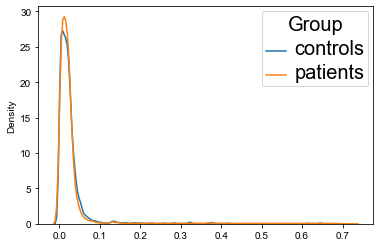

<Figure size 720x720 with 0 Axes>

In [6]:

ax = sns.kdeplot(x = BASC_controls_persistances, label = "controls")
ax = sns.kdeplot(x = BASC_patients_persistances, label = "patients")

plt.legend(title='Group', loc='upper right', labels=['controls', 'patients'])
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()
plt.savefig('BASC_persistances.png')

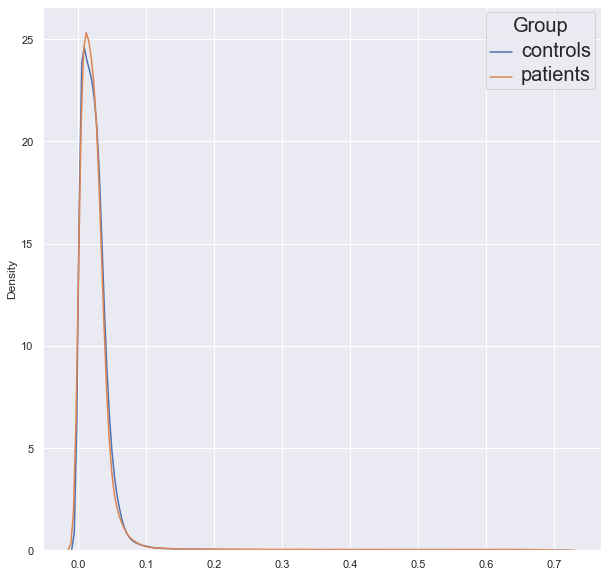

<Figure size 720x720 with 0 Axes>

In [7]:
ax = sns.kdeplot(x = AAL_controls_persistances, label = "controls")
ax = sns.kdeplot(x = AAL_patients_persistances, label = "patients")

plt.legend(title='Group', loc='upper right', labels=['controls', 'patients'])
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

plt.savefig('AAL_persistances.png')

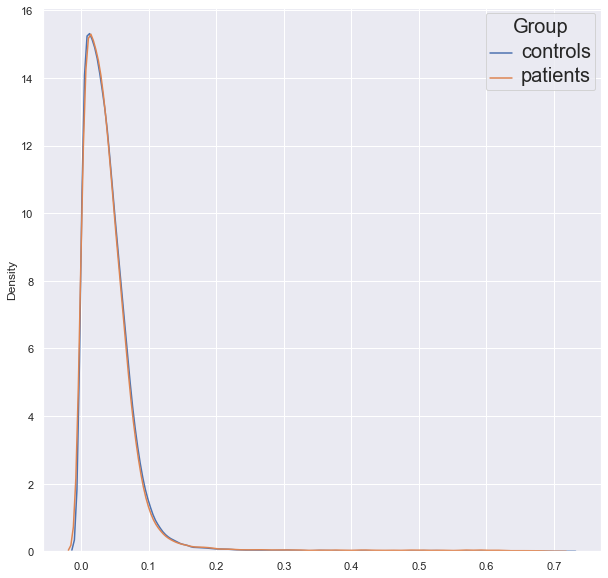

<Figure size 720x720 with 0 Axes>

In [8]:
ax = sns.kdeplot(x = MSDL_controls_persistances, label = "controls")
ax = sns.kdeplot(x = MSDL_patients_persistances, label = "patients")

plt.legend(title='Group', loc='upper right', labels=['controls', 'patients'])
plt.setp(ax.get_legend().get_texts(), fontsize='20') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='20')
sns.set(rc={'figure.figsize':(10,10)})
plt.show()

plt.savefig('MSDL_persistances.png')

In [9]:
from scipy.stats import kstest

kstest(MSDL_controls_persistances, MSDL_patients_persistances, mode = "asymp")

KstestResult(statistic=0.011458202302364495, pvalue=3.736461332331169e-05)

In [10]:
from scipy.stats import kstest

kstest(BASC_controls_persistances, BASC_patients_persistances, mode = "asymp")

KstestResult(statistic=0.0505118795227717, pvalue=0.0)

In [11]:
from scipy.stats import kstest

kstest(AAL_controls_persistances, AAL_patients_persistances, mode = "asymp")

KstestResult(statistic=0.029801319243274116, pvalue=1.5784646389238144e-206)

In [12]:
from scipy.stats import wasserstein_distance

wasserstein_distance(BASC_controls_persistances, BASC_patients_persistances)

0.00438339634286115

### Всякие картиночки

In [29]:
df_1 = pd.read_csv('data/controls/MSDL/sub-OAS30001_ses-d0129_task-rest_run-2_atlas-MSDL.csv')

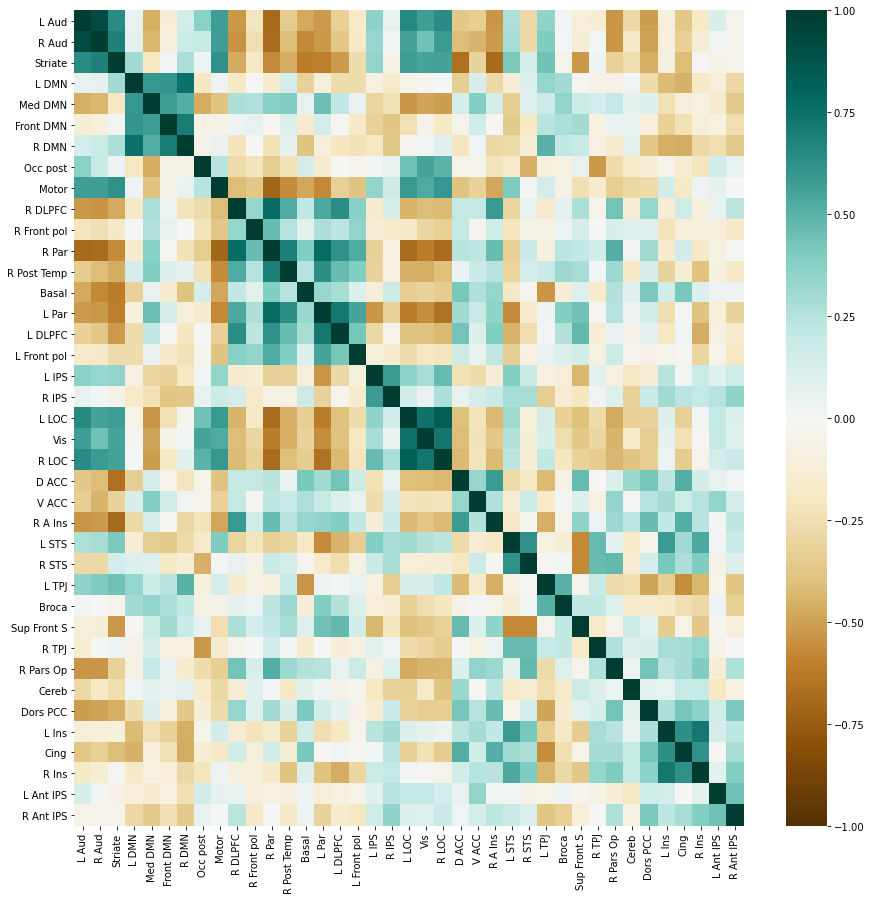

In [34]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df_1.iloc[:,1:].corr(), vmin=-1, vmax=1, cmap='BrBG')
plt.savefig('MSDL_corr_matrix_controls.png')

In [35]:
df_2 = pd.read_csv('data/patients/MSDL/sub-OAS30013_ses-d0102_task-rest_run-1_atlas-MSDL.csv')

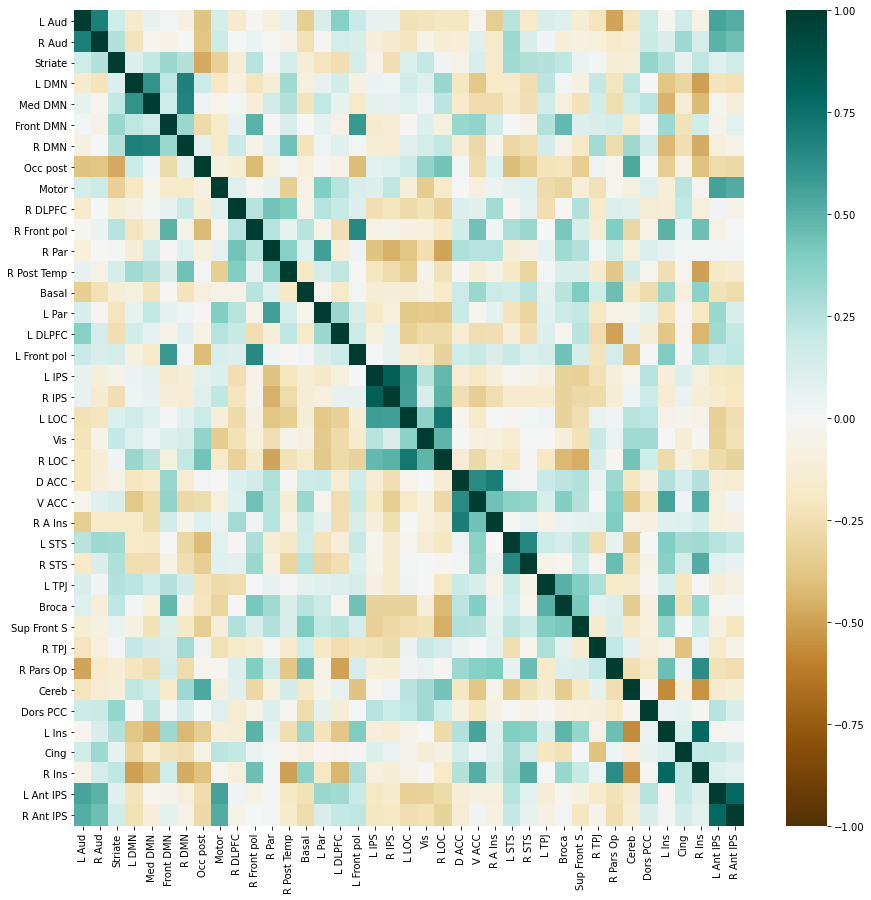

In [36]:
fig, ax = plt.subplots(figsize=(15,15))  
sns.heatmap(df_2.iloc[:,1:].corr(), vmin=-1, vmax=1, cmap='BrBG')
plt.savefig('MSDL_corr_matrix_patients.png')

In [29]:
df_3

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,187,188,189,190,191,192,193,194,195,196
0,0,-0.464991,-0.392232,-0.204124,-0.204124,-0.204124,-0.392232,-0.464991,-0.392232,-0.392232,...,-0.392232,-0.392232,-0.392232,-0.392232,-0.685994,-0.392232,-0.204124,-0.707107,-0.204124,-0.392232
1,1,0.116248,0.588348,-0.204124,-0.204124,-0.204124,0.588348,0.116248,0.588348,0.588348,...,0.588348,0.588348,0.588348,0.588348,1.028992,0.588348,-0.204124,0.000000,-0.204124,0.588348
2,2,-1.627467,-1.372813,-1.224745,-1.224745,-1.224745,-1.372813,-1.627467,-1.372813,-1.372813,...,-1.372813,-1.372813,-1.372813,-1.372813,-1.543487,-1.372813,-1.224745,-1.414214,-1.224745,-1.372813
3,3,0.697486,-0.392232,-0.204124,-0.204124,-0.204124,-0.392232,0.697486,-0.392232,-0.392232,...,-0.392232,-0.392232,-0.392232,-0.392232,0.171499,-0.392232,-0.204124,0.707107,-0.204124,-0.392232
4,4,1.278724,1.568929,1.837117,1.837117,1.837117,1.568929,1.278724,1.568929,1.568929,...,1.568929,1.568929,1.568929,1.568929,1.028992,1.568929,1.837117,1.414214,1.837117,1.568929


In [28]:
df_3 = pd.read_csv('data/controls/BASC/sub-OAS30001_ses-d0129_task-rest_run-1_atlas-BASC.csv')

<AxesSubplot:>

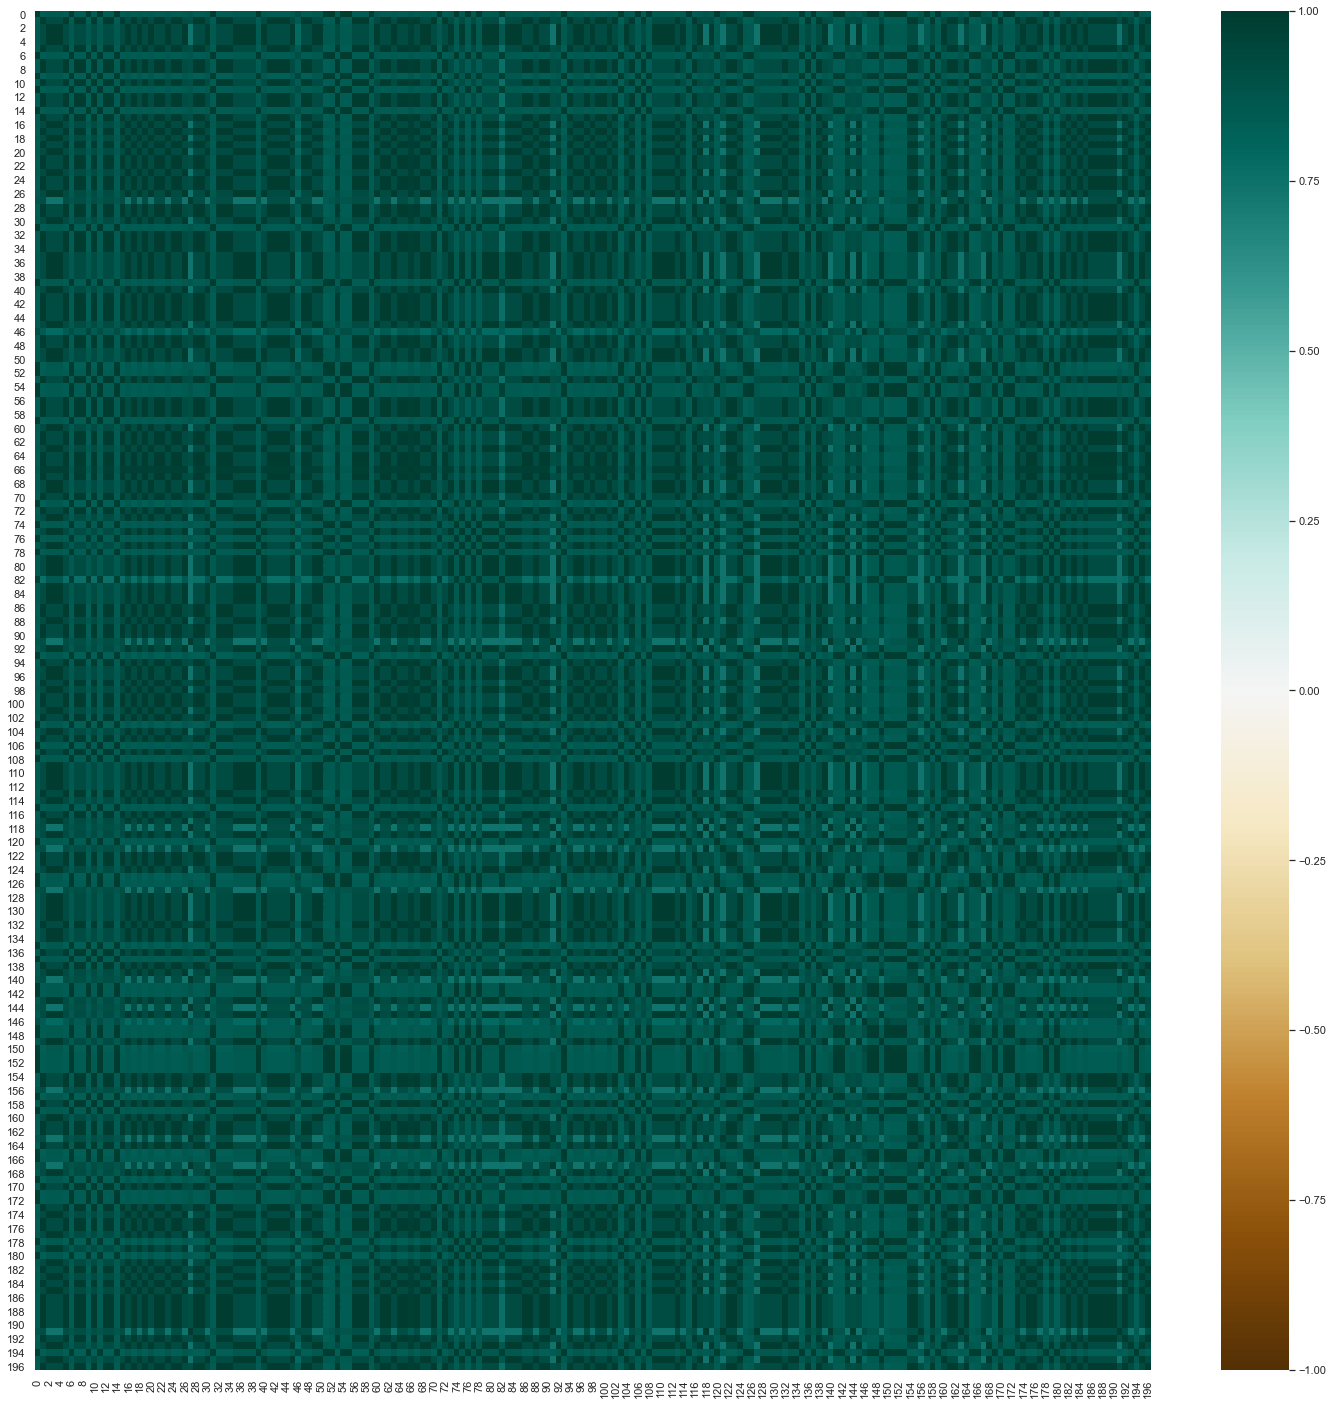

In [30]:
fig, ax = plt.subplots(figsize=(25,25))  
sns.heatmap(df_3.iloc[:,1:].corr(), vmin=-1, vmax=1, cmap='BrBG')

### Диаграммы устойчивости

In [13]:
import pickle

filename1 = 'MSDL_diagrams.sav'
MSDL_diagrams = pickle.load(open(filename1, 'rb'))

In [14]:
import pickle

filename2 = 'AAL_diagrams.sav'
AAL_diagrams = pickle.load(open(filename2, 'rb'))

In [15]:
import pickle

filename2 = 'BASC_diagrams.sav'
BASC_diagrams = pickle.load(open(filename2, 'rb'))

In [148]:
len(MSDL_diagrams['controls'])

1292

In [175]:
len(MSDL_diagrams['patients'])

813

In [23]:
VR = VietorisRipsPersistence()
VR.plot(MSDL_diagrams['patients'][0])

In [19]:
VR = VietorisRipsPersistence()
VR.plot(MSDL_diagrams['controls'][0])

In [275]:
D1_MSDL = np.concatenate(MSDL_diagrams['patients'], axis=1)[:, :, :2]

In [276]:
D2_MSDL = np.concatenate(MSDL_diagrams['controls'], axis=1)[:, :, :2]

In [257]:
D2.shape

(1, 108091, 2)

### Расстояние bottleneck между двумя диаграммами устойчивости

In [265]:
from gudhi import bottleneck_distance

bottleneck_distance(D1_MSDL[0], D2_MSDL[0])

0.09100359678268433

In [271]:
D1_MS[0][:, 0]

array([0.        , 0.14123526, 0.09858386, ..., 0.92336988, 0.92305803,
       0.92160165])

<AxesSubplot:>

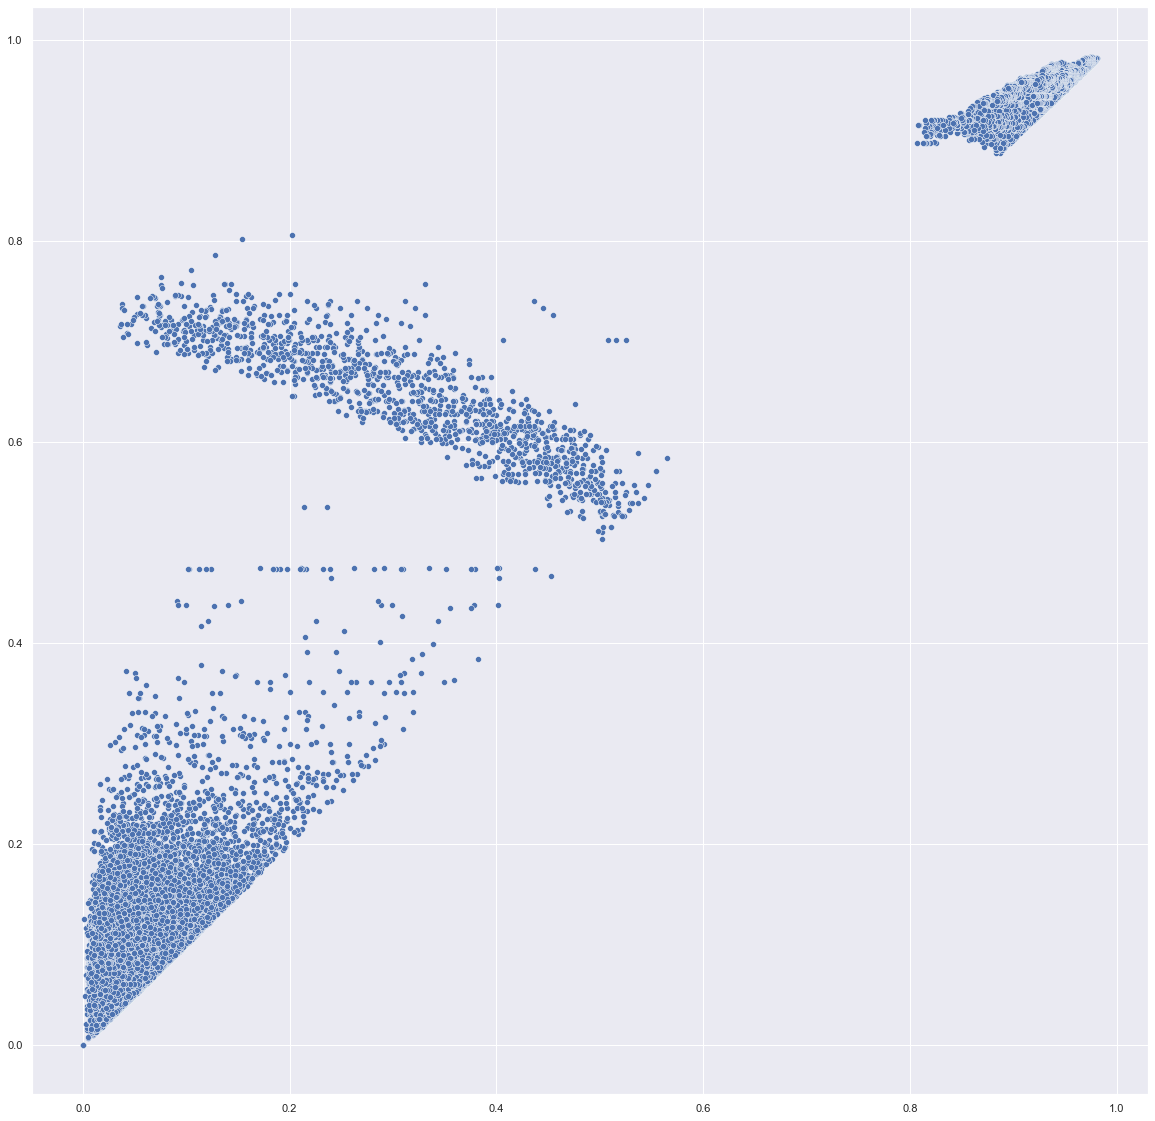

In [307]:
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(x = D1_MSDL[0][:, 0], y = D1_MSDL[0][:, 1])

<AxesSubplot:>

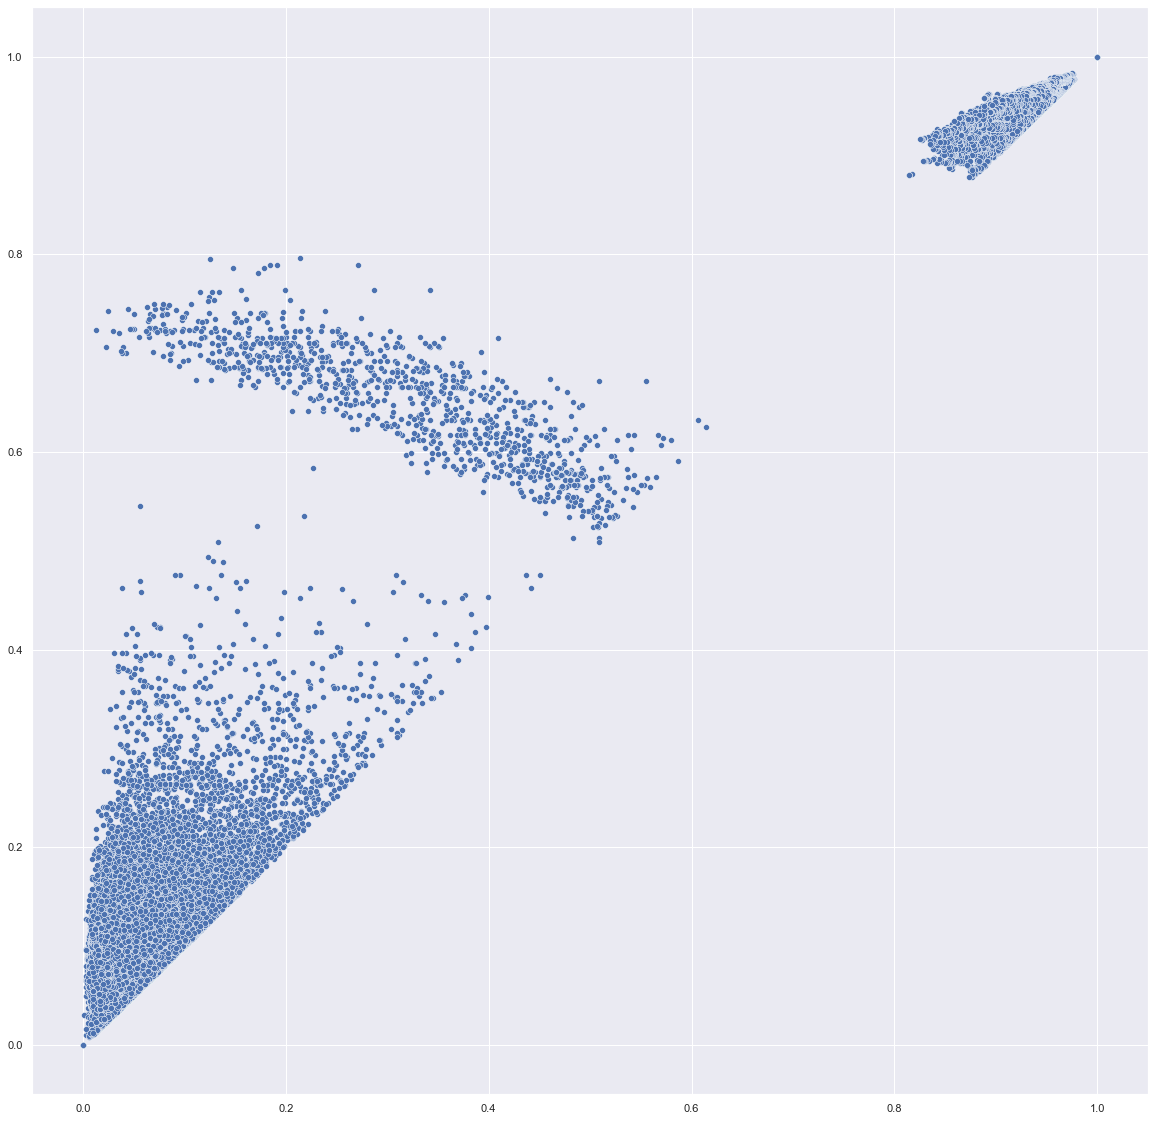

In [308]:
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(x = D2_MSDL[0][:, 0], y = D2_MSDL[0][:, 1])

In [277]:
D1_AAL = np.concatenate(AAL_diagrams['patients'], axis=1)[:, :, :2]

In [278]:
D2_AAL = np.concatenate(AAL_diagrams['controls'], axis=1)[:, :, :2]

In [257]:
D2.shape

(1, 108091, 2)

### Расстояние bottleneck между двумя диаграммами устойчивости

In [279]:
from gudhi import bottleneck_distance

bottleneck_distance(D1_AAL[0], D2_AAL[0])

0.07355895638465881

In [271]:
D1_MS[0][:, 0]

array([0.        , 0.14123526, 0.09858386, ..., 0.92336988, 0.92305803,
       0.92160165])

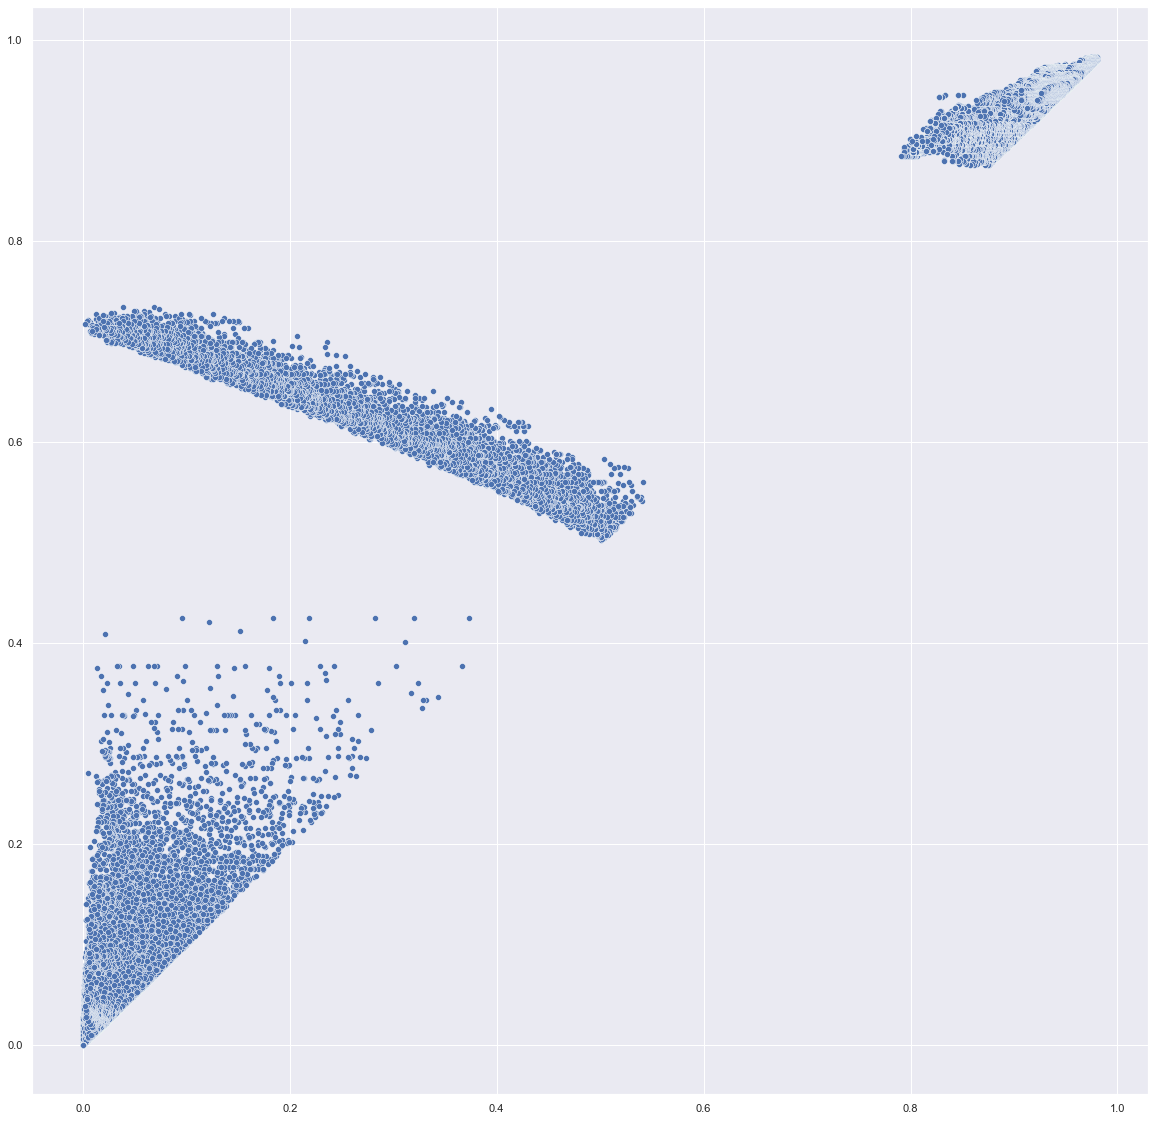

In [303]:
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(20,20)})
ax = sns.scatterplot(x = D1_AAL[0][:, 0], y = D1_AAL[0][:, 1])

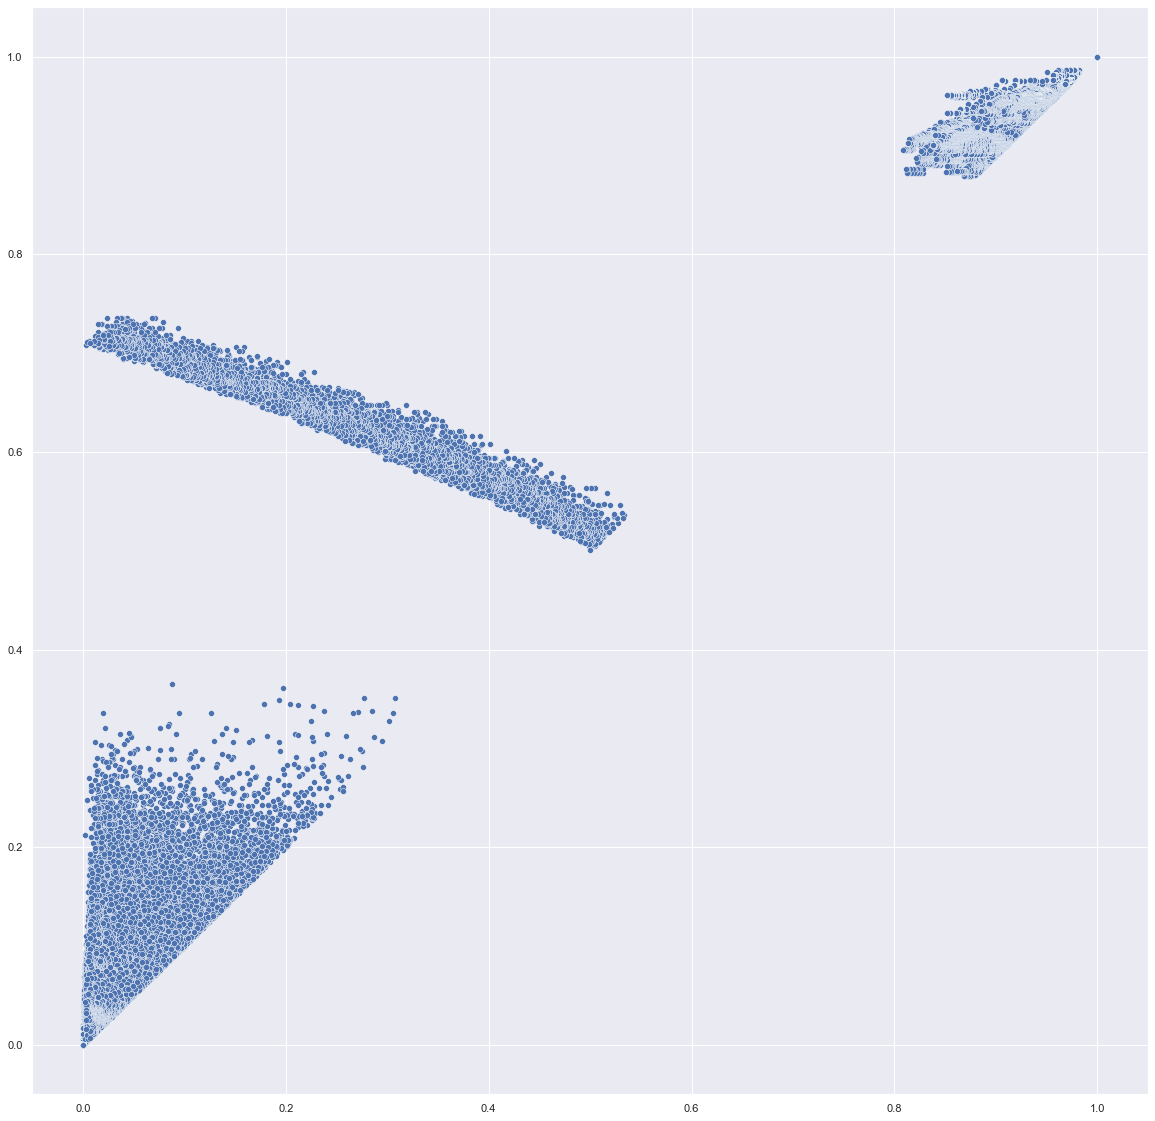

In [304]:
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(20,20)})
ax = sns.scatterplot(x = D2_AAL[0][:, 0], y = D2_AAL[0][:, 1])

In [283]:
D1_BASC = np.concatenate(BASC_diagrams['patients'], axis=1)[:, :, :2]

In [284]:
D2_BASC = np.concatenate(BASC_diagrams['controls'], axis=1)[:, :, :2]

In [257]:
D2.shape

(1, 108091, 2)

### Расстояние bottleneck между двумя диаграммами устойчивости

In [285]:
from gudhi import bottleneck_distance

bottleneck_distance(D1_BASC[0], D2_BASC[0])

0.18872351944446564

<AxesSubplot:>

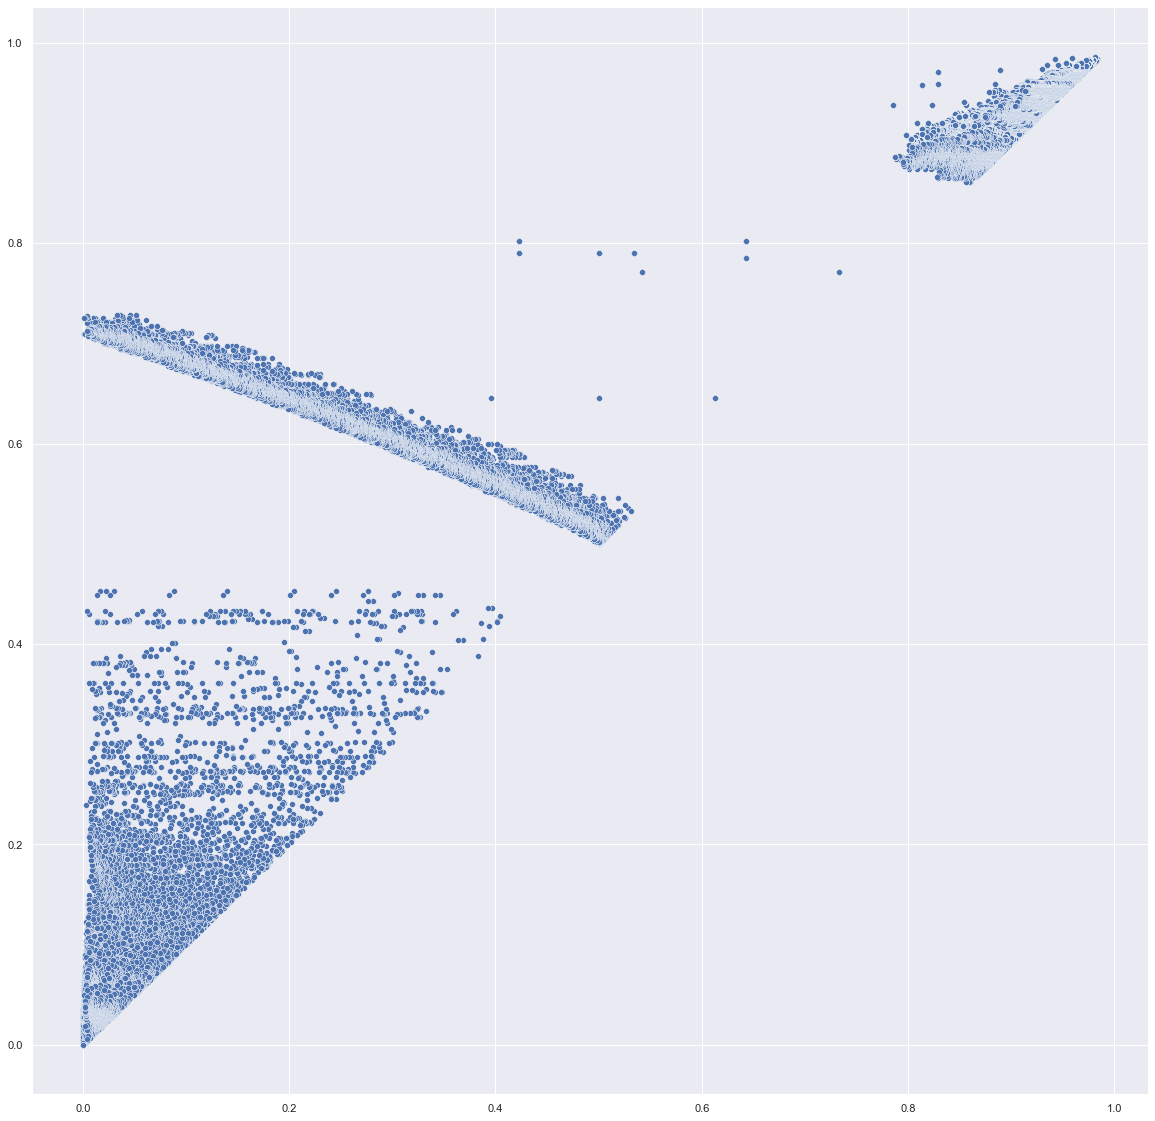

In [305]:
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(x = D1_BASC[0][:, 0], y = D1_BASC[0][:, 1])

<AxesSubplot:>

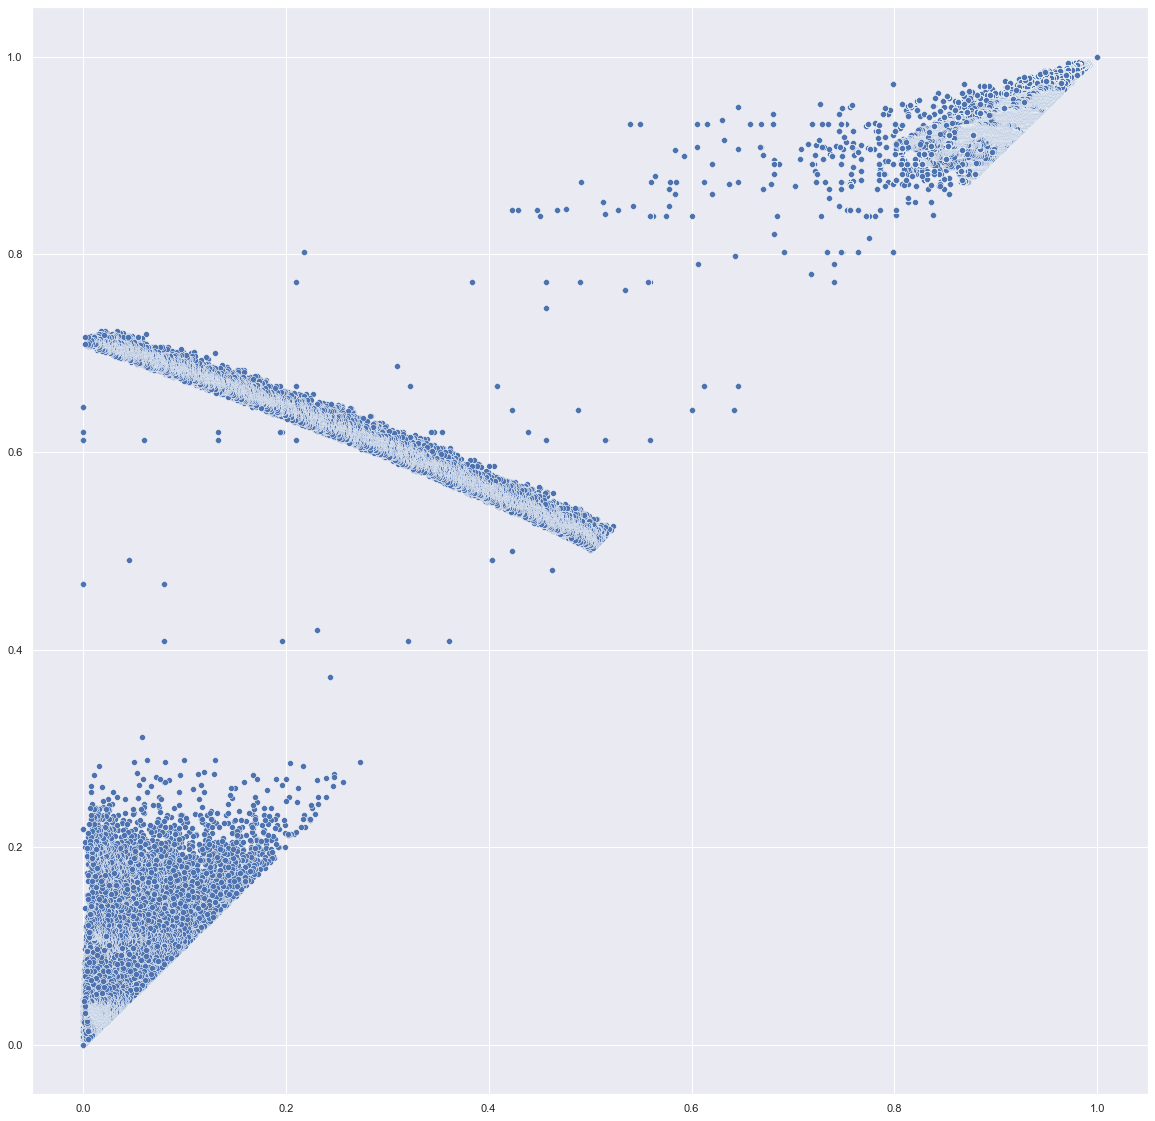

In [306]:
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(20,20)})
sns.scatterplot(x = D2_BASC[0][:, 0], y = D2_BASC[0][:, 1])

In [96]:
from gtda.diagrams import PairwiseDistance
PairwiseDistance(metric = 'wasserstein').fit_transform(MSDL_diagrams['patients'][1])

array([[0.]])

In [173]:
from scipy.stats import wasserstein_distance
wasserstein_distance(, [5, 6, 8])

5.0

In [ ]:
KstestResult(statistic=0.07380952380952381, pvalue=0.024300264948721728)
0.07183979498517677